In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

## Colab File Upload

In [ ]:
!git clone https://github.com/galav12/CSC442-Project.git

Cloning into 'CSC442-Project'...
remote: Enumerating objects: 47, done.
remote: Counting objects: 100% (47/47), done.
remote: Compressing objects: 100% (43/43), done.
remote: Total 47 (delta 18), reused 13 (delta 2), pack-reused 0 (from 0)
Receiving objects: 100% (47/47), 27.74 MiB | 16.50 MiB/s, done.
Resolving deltas: 100% (18/18), done.


In [ ]:
%cd CSC442-Project/
!ls

/content/CSC442-Project
'CSC442 Dataset Report (1).pdf'   data	 dataset_cleaner.ipynb	 README.md   teamnotes


## Cleaning Pollution Dataset

In [ ]:
pollution_full = pd.read_csv("data/Pollution.zip", compression="zip")
pollution_full.shape

(1746661, 29)

In [ ]:
pollution = pollution_full[(pollution_full["Date Local"].str[:4] <=  "2015") & (pollution_full["Date Local"].str[:4] >=  "2011") & (pollution_full["State"] != "District Of Columbia")]
pollution = pollution[["State","Date Local","NO2 Mean","NO2 1st Max Value","NO2 AQI","O3 Mean","O3 1st Max Value","O3 AQI","SO2 Mean","SO2 1st Max Value","SO2 AQI","CO Mean","CO 1st Max Value","CO AQI"]]
pollution["Year"] = pollution["Date Local"].str[:4]
pollution['Year'] = pollution['Year'].astype(int)
pollution = pollution.drop(columns=["Date Local"])
print(pollution.shape)

(640025, 14)


In [ ]:
pollution["NO2 AQI"] = pollution["NO2 AQI"].astype(np.float64)
pollution["O3 AQI"] = pollution["O3 AQI"].astype(np.float64)
pollution.info()


<class 'pandas.core.frame.DataFrame'>
Index: 640025 entries, 1072382 to 1722056
Data columns (total 14 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   State              640025 non-null  object 
 1   NO2 Mean           640025 non-null  float64
 2   NO2 1st Max Value  640025 non-null  float64
 3   NO2 AQI            640025 non-null  float64
 4   O3 Mean            640025 non-null  float64
 5   O3 1st Max Value   640025 non-null  float64
 6   O3 AQI             640025 non-null  float64
 7   SO2 Mean           640025 non-null  float64
 8   SO2 1st Max Value  640025 non-null  float64
 9   SO2 AQI            320210 non-null  float64
 10  CO Mean            640025 non-null  float64
 11  CO 1st Max Value   640025 non-null  float64
 12  CO AQI             319955 non-null  float64
 13  Year               640025 non-null  int64  
dtypes: float64(12), int64(1), object(1)
memory usage: 73.2+ MB


In [ ]:
# Aggregating pollution by state and year
pollution_no_outliers = pollution.copy()
for col in pollution_no_outliers.columns[1:]:
        pollution_no_outliers = pollution_no_outliers[(pollution_no_outliers[col] >= pollution_no_outliers[col].quantile(0.05)) & (pollution_no_outliers[col] <= pollution_no_outliers[col].quantile(0.95))]

pollution_state = pollution_no_outliers.groupby(["State","Year"]).aggregate('mean').reset_index()
pollution_state.shape

(188, 14)

In [ ]:
# pollution_state.to_csv("data/pollution_clean.csv",index=False)

## Cleaning Heart Disease Dataset

In [ ]:
heart_full = pd.read_csv("data/Heart_Disease.zip", compression="zip")
heart_full.shape

<ipython-input-8-1f9cd1d613a9>:1: DtypeWarning: Columns (4,5) have mixed types. Specify dtype option on import or set low_memory=False.
  heart_full = pd.read_csv("data/Heart_Disease.zip", compression="zip")


(85800, 29)

In [ ]:
heart = heart_full[["Year","LocationDesc","Category","Topic","Data_Value_Type","Data_Value","Break_Out_Category","Break_out"]]

heart = heart.pivot_table(index=["Year", "LocationDesc", "Category", "Topic", "Break_Out_Category", "Break_out"], columns="Data_Value_Type", values="Data_Value").reset_index()
heart.shape

(30299, 8)

In [ ]:
heart['Break_out_Age'] = heart.apply(lambda row: row['Break_out'] if row['Break_Out_Category'] == 'Age' else np.nan, axis=1)
heart['Break_out_Gender'] = heart.apply(lambda row: row['Break_out'] if row['Break_Out_Category'] == 'Gender' else np.nan, axis=1)
heart['Break_out_Overall'] = heart.apply(lambda row: row['Break_out'] if row['Break_Out_Category'] == 'Overall' else np.nan, axis=1)
heart['Break_out_Race'] = heart.apply(lambda row: row['Break_out'] if row['Break_Out_Category'] == 'Race' else np.nan, axis=1)
heart = heart.drop(columns=["Break_out","Break_Out_Category"])
heart.shape

(30299, 10)

In [ ]:
heart.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30299 entries, 0 to 30298
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Year               30299 non-null  int64  
 1   LocationDesc       30299 non-null  object 
 2   Category           30299 non-null  object 
 3   Topic              30299 non-null  object 
 4   Age-Standardized   16767 non-null  float64
 5   Crude              29766 non-null  float64
 6   Break_out_Age      13501 non-null  object 
 7   Break_out_Gender   5112 non-null   object 
 8   Break_out_Overall  2556 non-null   object 
 9   Break_out_Race     9130 non-null   object 
dtypes: float64(2), int64(1), object(7)
memory usage: 2.3+ MB


In [ ]:
# heart.to_csv("data/heart_clean.csv",index=False)

## Merging Dataset

In [ ]:
merged = pd.merge(heart, pollution_state, left_on=["LocationDesc","Year"], right_on=["State","Year"], how="left")

In [ ]:
merged_data = merged[merged["State"].notna()]
merged_data = merged_data.drop(columns=["State"])
merged_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 21997 entries, 255 to 30298
Data columns (total 22 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Year               21997 non-null  int64  
 1   LocationDesc       21997 non-null  object 
 2   Category           21997 non-null  object 
 3   Topic              21997 non-null  object 
 4   Age-Standardized   12255 non-null  float64
 5   Crude              21651 non-null  float64
 6   Break_out_Age      9717 non-null   object 
 7   Break_out_Gender   3682 non-null   object 
 8   Break_out_Overall  1841 non-null   object 
 9   Break_out_Race     6757 non-null   object 
 10  NO2 Mean           21997 non-null  float64
 11  NO2 1st Max Value  21997 non-null  float64
 12  NO2 AQI            21997 non-null  float64
 13  O3 Mean            21997 non-null  float64
 14  O3 1st Max Value   21997 non-null  float64
 15  O3 AQI             21997 non-null  float64
 16  SO2 Mean           21997 

In [ ]:
# merged_data.to_csv("data/merged_data.csv",index=False)

## Outliers

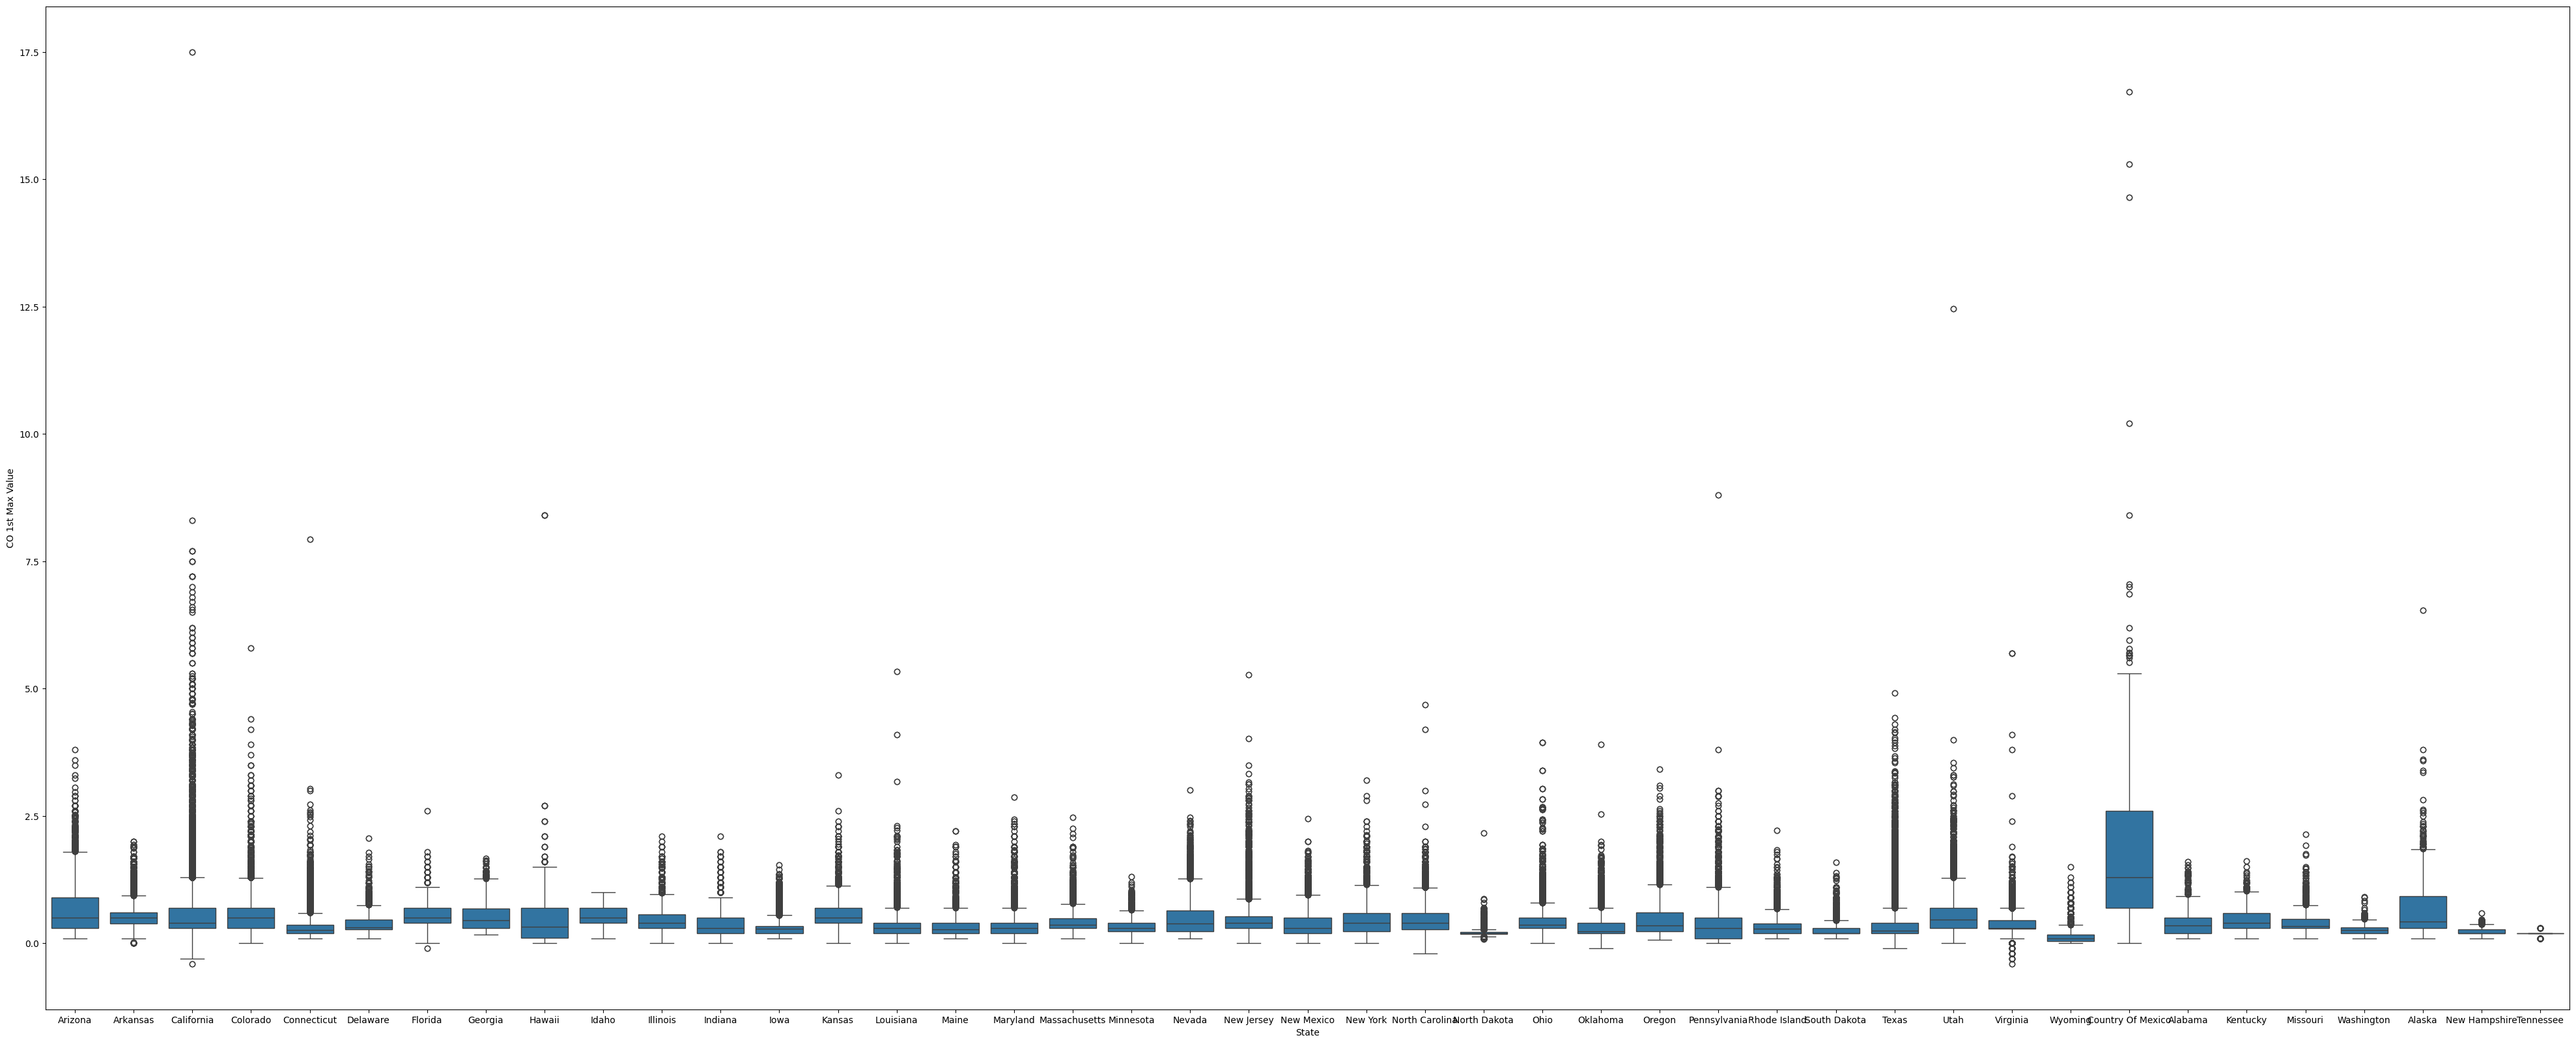

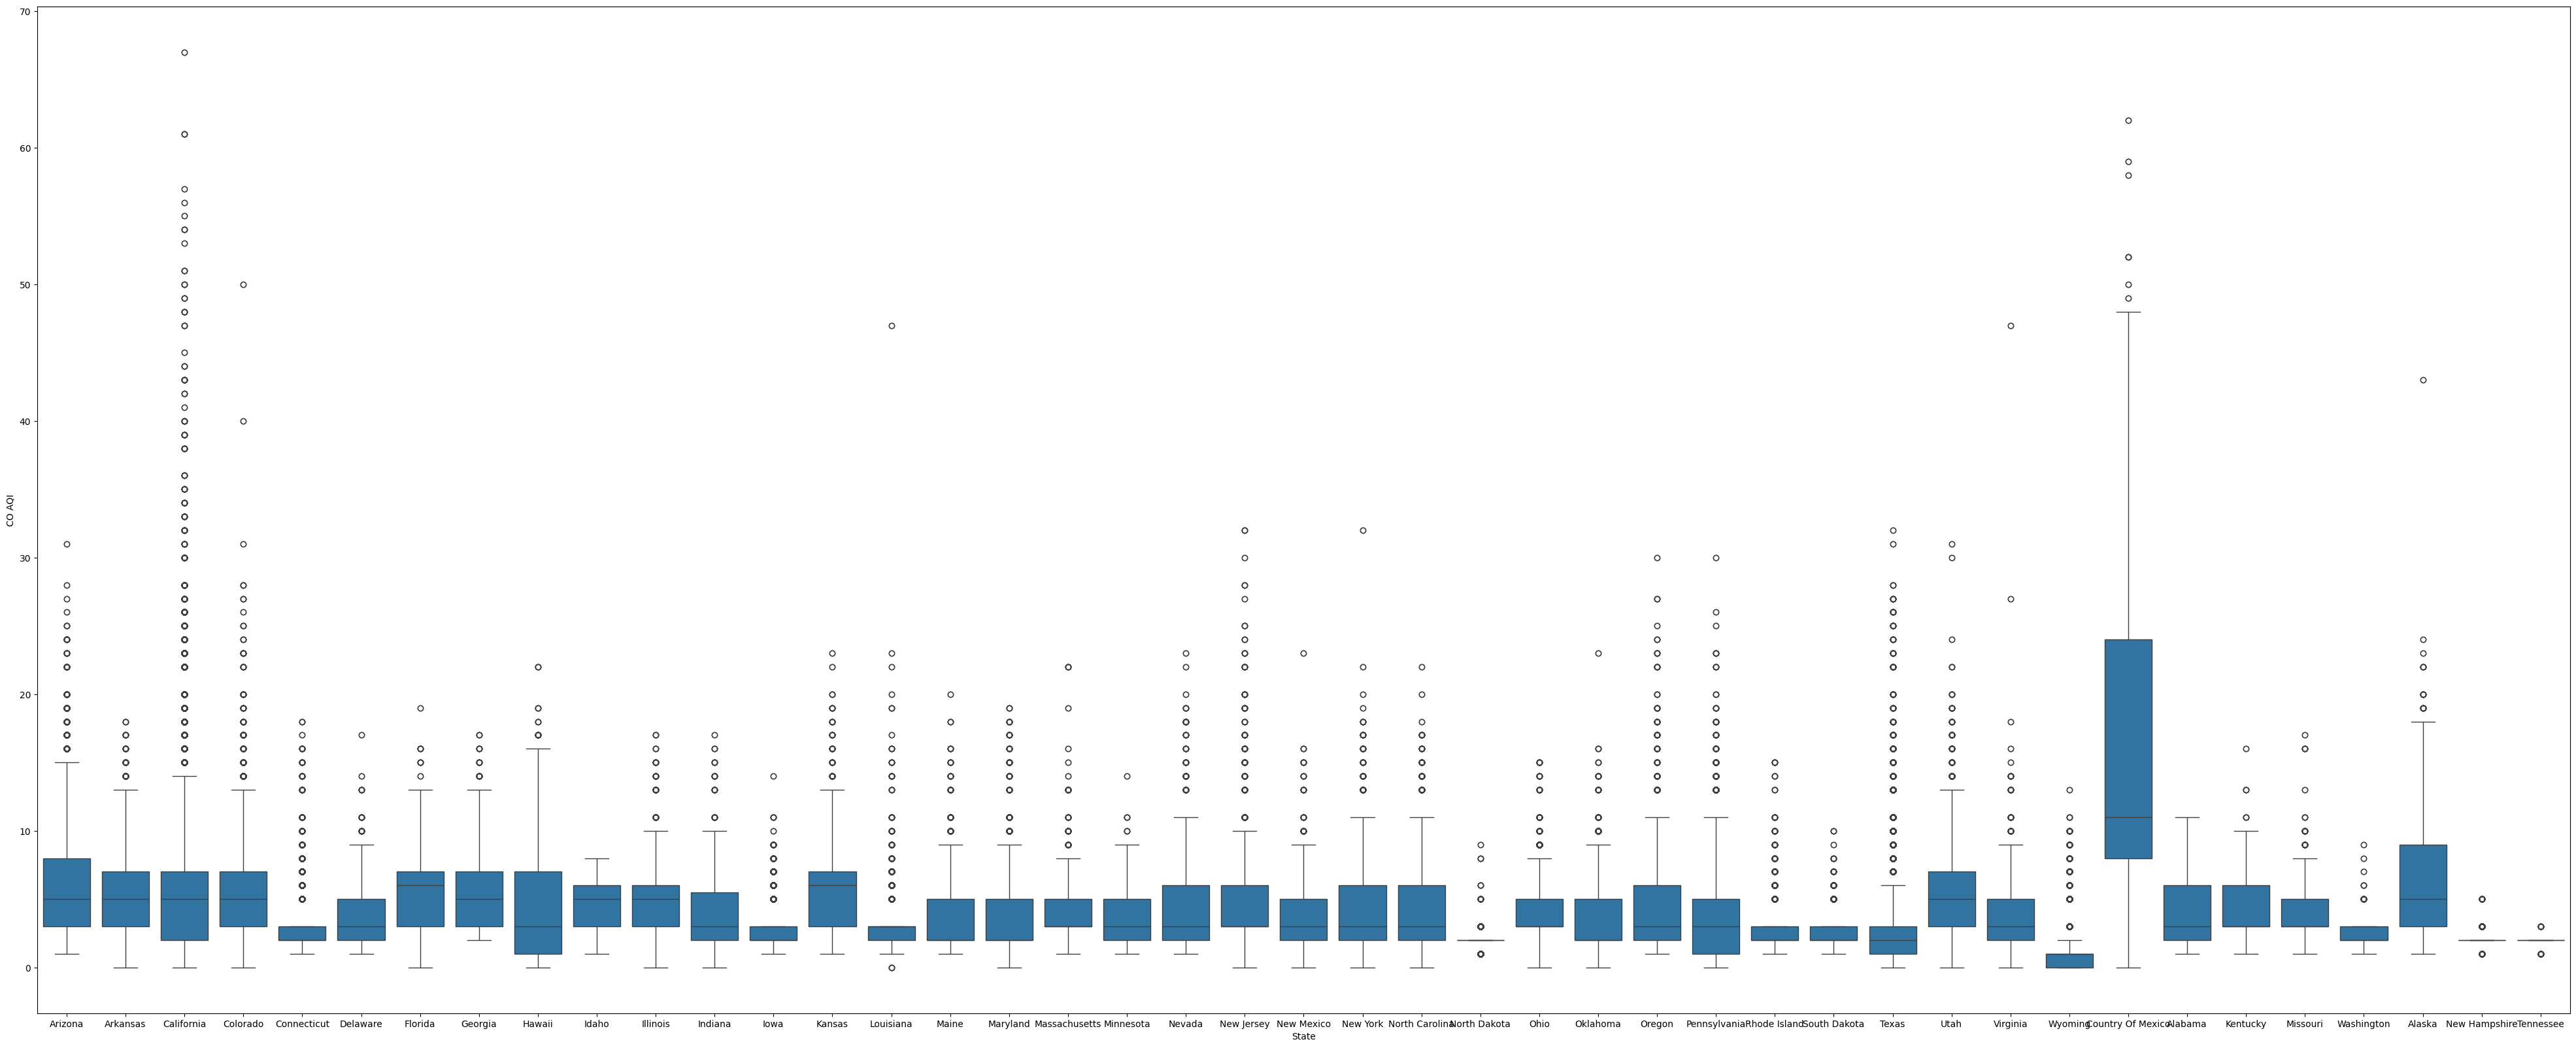

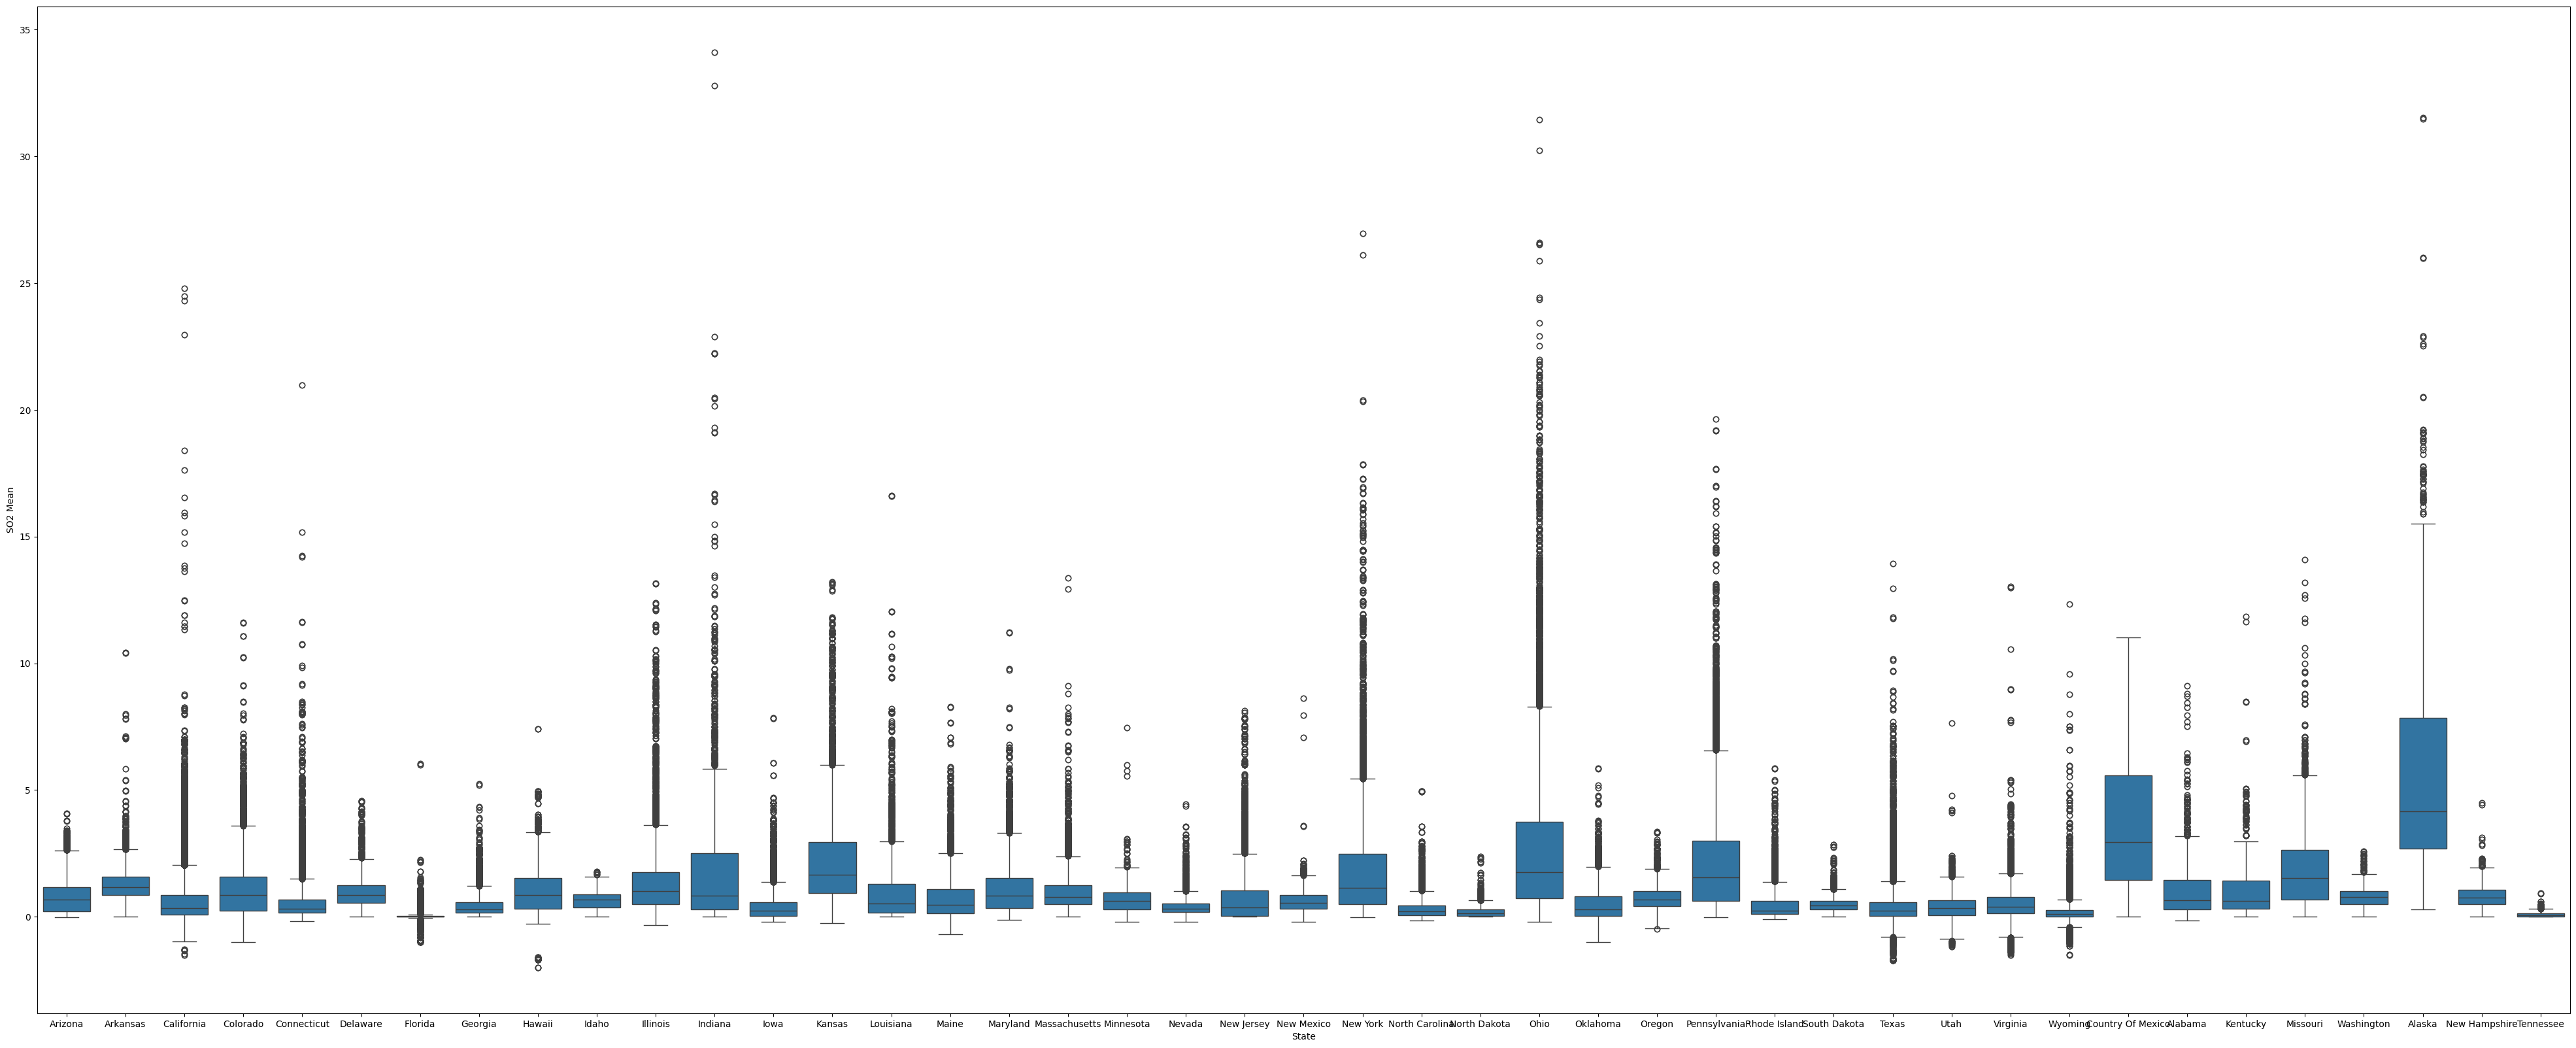

In [ ]:
plt.figure(figsize=(50,20))
sns.boxplot(x=pollution["State"], y=pollution['CO 1st Max Value'])
plt.show()
plt.figure(figsize=(50,20))
sns.boxplot(x=pollution["State"], y=pollution['CO AQI'])
plt.show()
plt.figure(figsize=(50,20))
sns.boxplot(x=pollution["State"], y=pollution['SO2 Mean'])
plt.show()

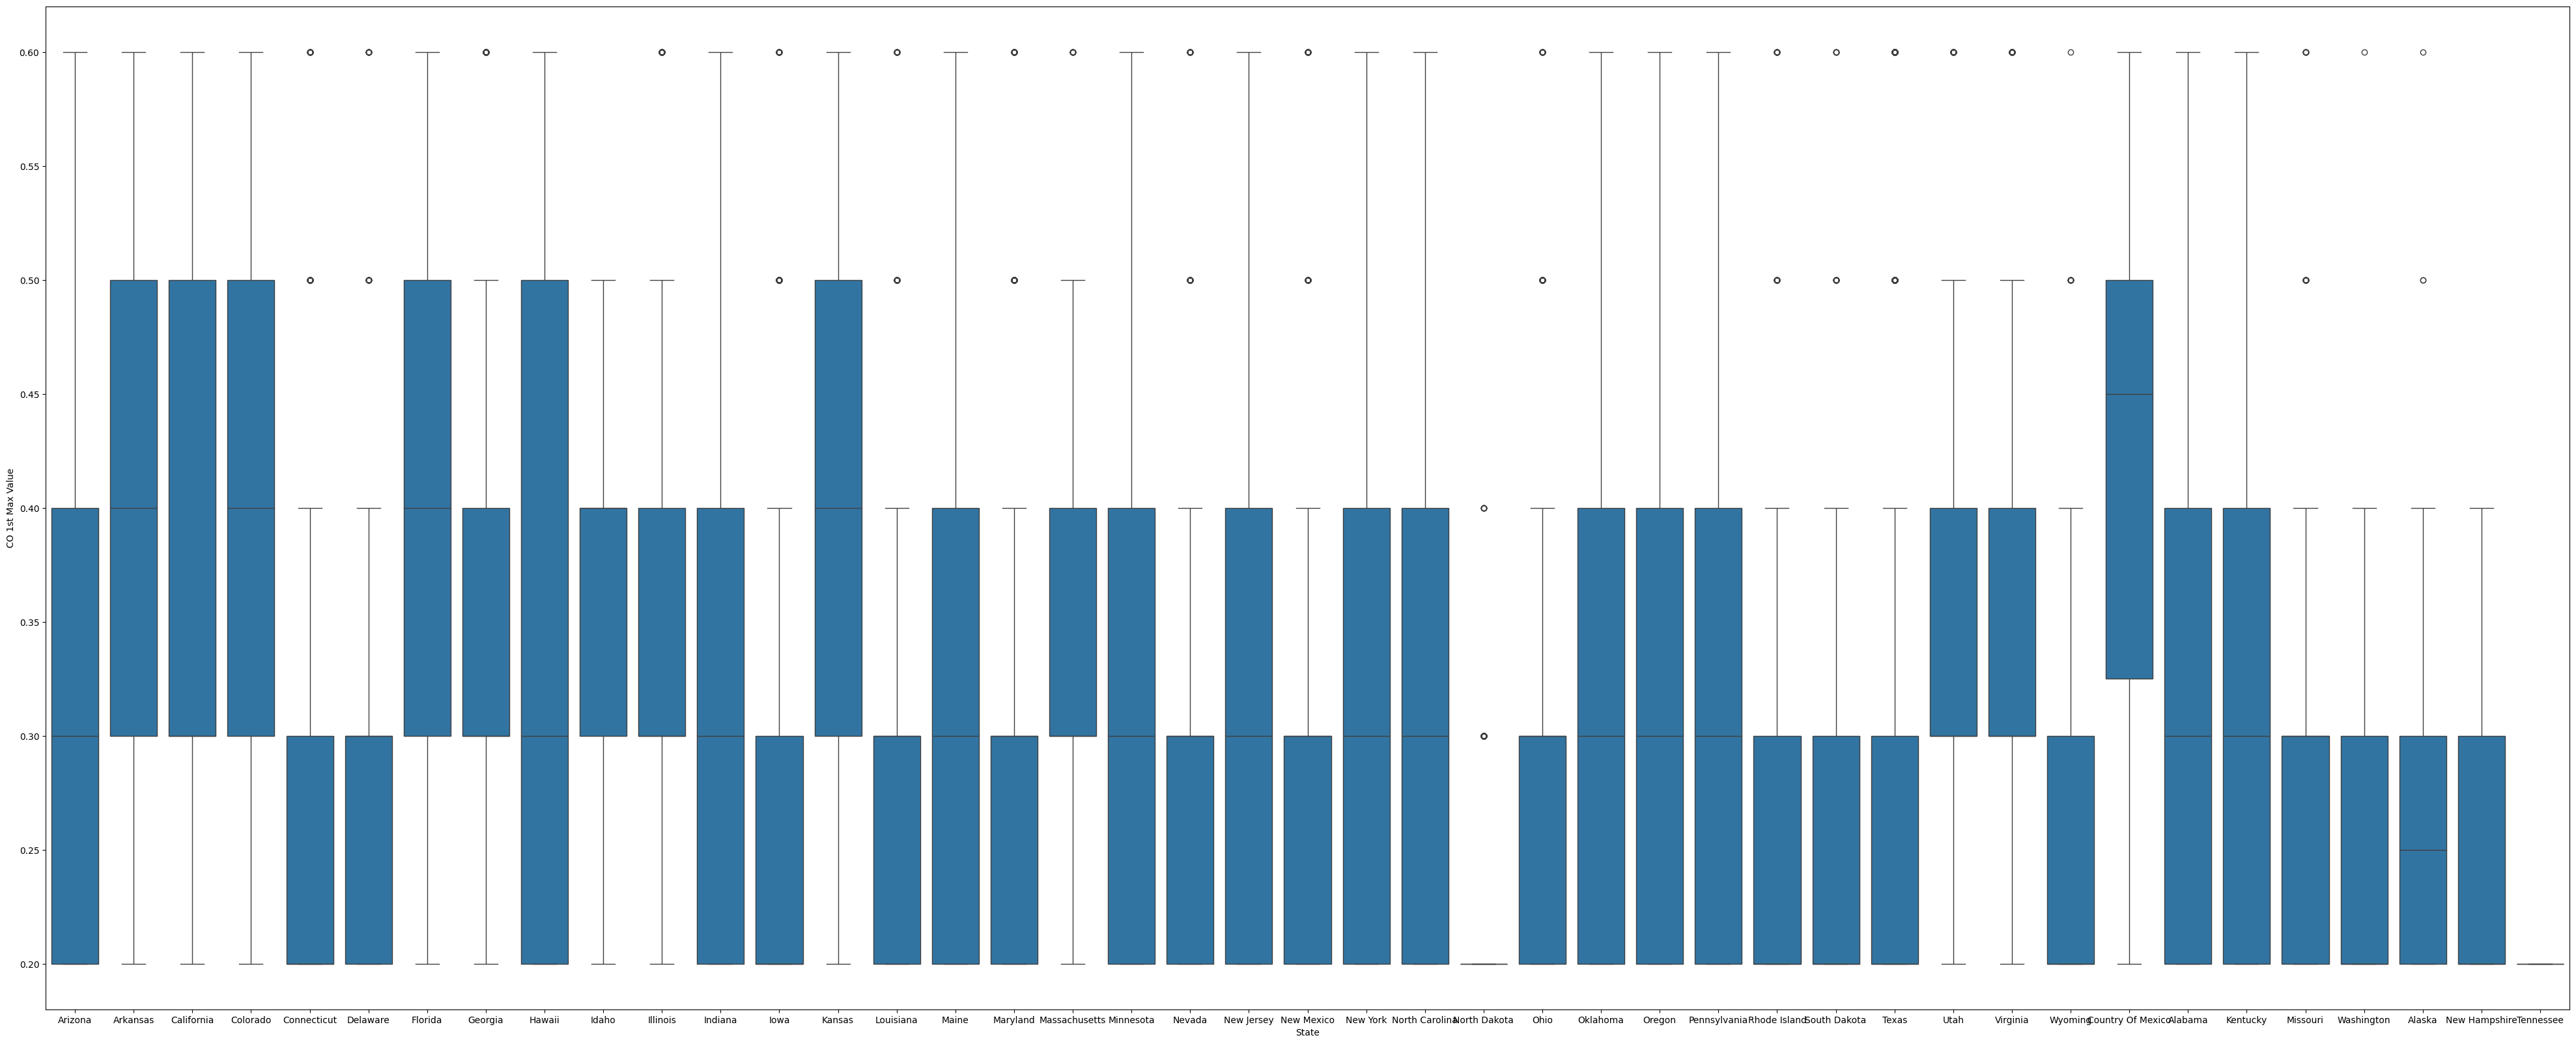

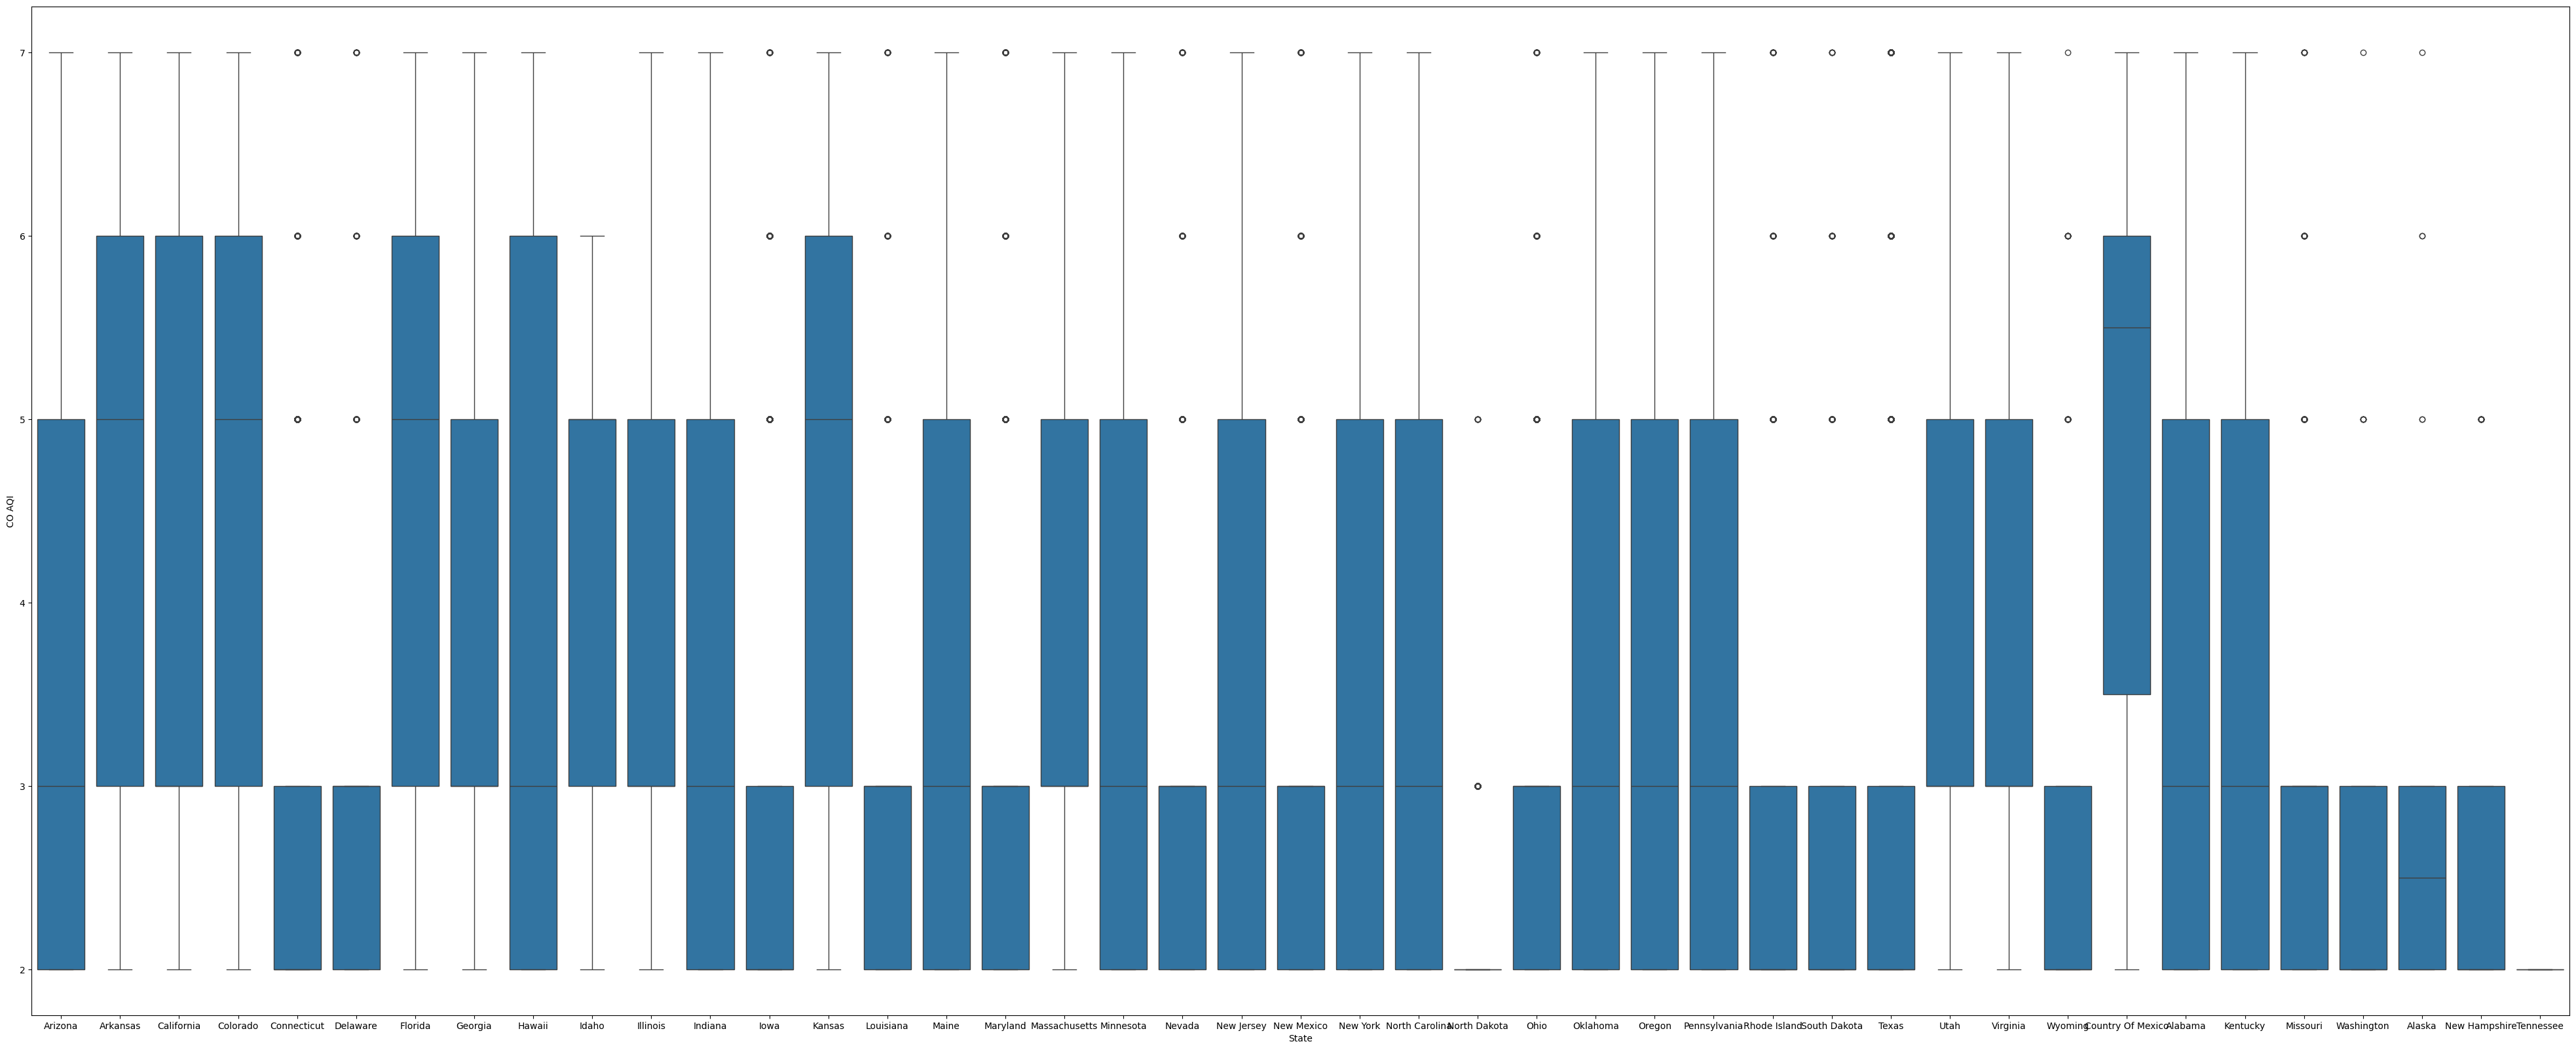

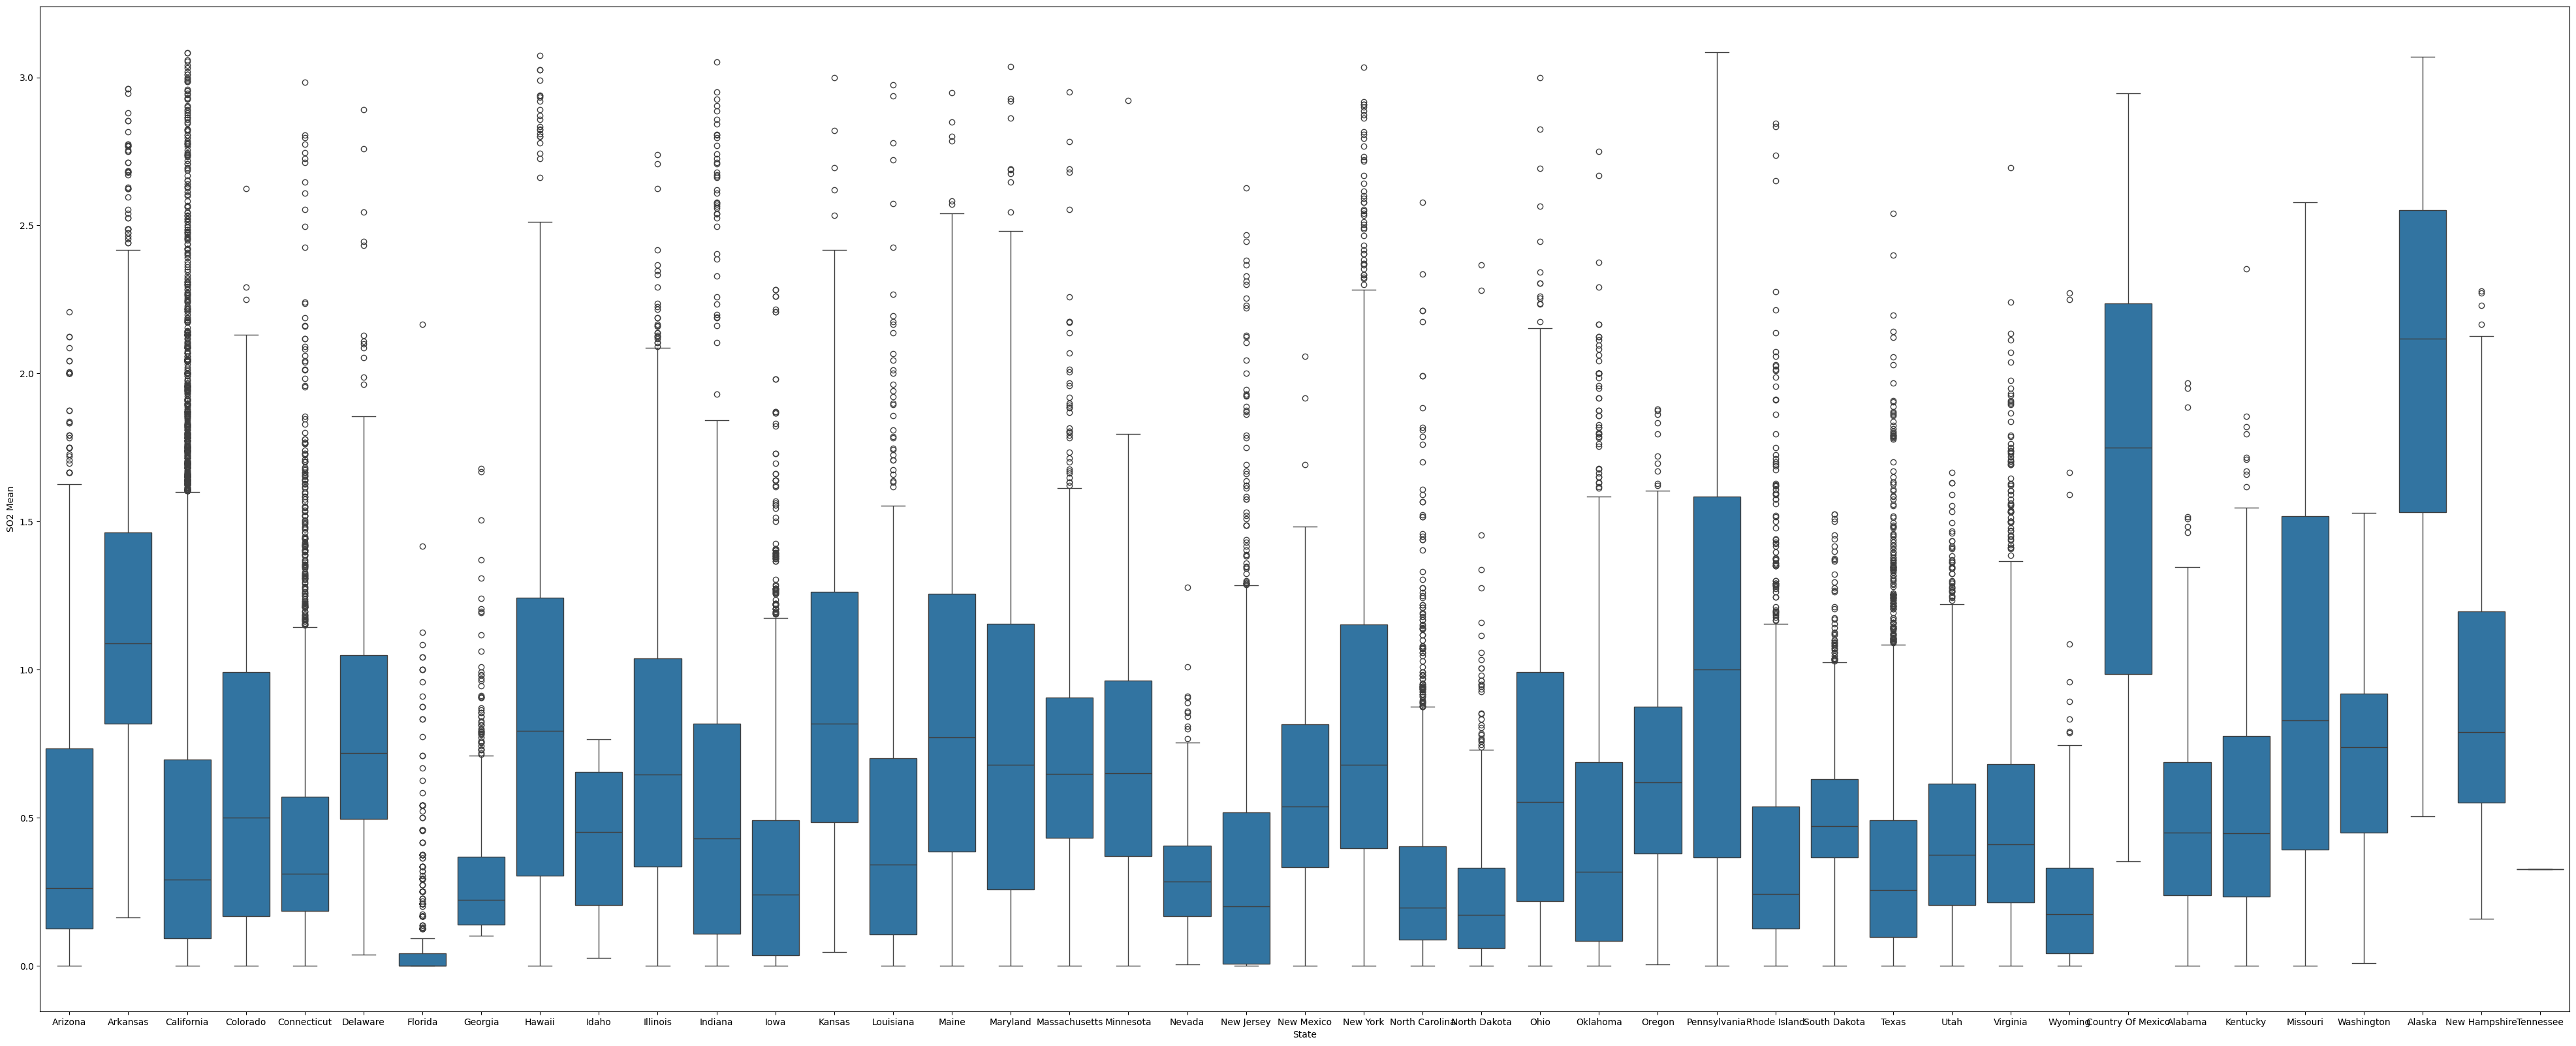

In [ ]:
plt.figure(figsize=(50,20))
sns.boxplot(x=pollution_no_outliers["State"], y=pollution_no_outliers['CO 1st Max Value'])
plt.show()
plt.figure(figsize=(50,20))
sns.boxplot(x=pollution_no_outliers["State"], y=pollution_no_outliers['CO AQI'])
plt.show()
plt.figure(figsize=(50,20))
sns.boxplot(x=pollution_no_outliers["State"], y=pollution_no_outliers['SO2 Mean'])
plt.show()

## EDA

In [ ]:
merged_data.describe()

,Year,Age-Standardized,Crude,NO2 Mean,NO2 1st Max Value,NO2 AQI,O3 Mean,O3 1st Max Value,O3 AQI,SO2 Mean,SO2 1st Max Value,SO2 AQI,CO Mean,CO 1st Max Value,CO AQI
count,21997.000000,12255.000000,21651.000000,21997.000000,21997.000000,21997.000000,21997.000000,21997.000000,21997.000000,21997.000000,21997.000000,21997.000000,21997.000000,21997.000000,21997.000000
mean,2013.086239,30.347813,31.590139,8.692366,19.847416,18.418916,0.026938,0.037898,33.678058,0.585720,1.429389,1.390298,0.237276,0.313563,3.448425
std,1.463215,27.728486,28.390830,2.479225,4.176604,3.937881,0.003034,0.003365,2.950223,0.324823,0.563859,0.799468,0.048838,0.051847,0.701192
min,2011.000000,1.300000,0.300000,1.782609,7.100000,7.000000,0.014166,0.023438,21.437500,0.022730,0.283019,0.000000,0.131982,0.200000,2.000000
25%,2012.000000,6.300000,7.500000,7.249678,17.007692,15.606061,0.025398,0.035897,32.151316,0.340714,1.011184,0.752613,0.205212,0.280233,3.002551
50%,2013.000000,20.700000,20.800000,8.504425,19.584615,18.320388,0.026975,0.038017,33.671642,0.521170,1.394595,1.255435,0.235411,0.312785,3.430464
75%,2014.000000,49.250000,59.325000,10.248007,22.685590,21.185792,0.028602,0.039890,35.461153,0.790987,1.838217,2.054852,0.261877,0.342857,3.825581
max,2015.000000,93.900000,93.800000,15.009458,29.445055,27.654206,0.041500,0.044716,41.000000,2.376164,3.793750,4.750000,0.409548,0.519608,6.117647


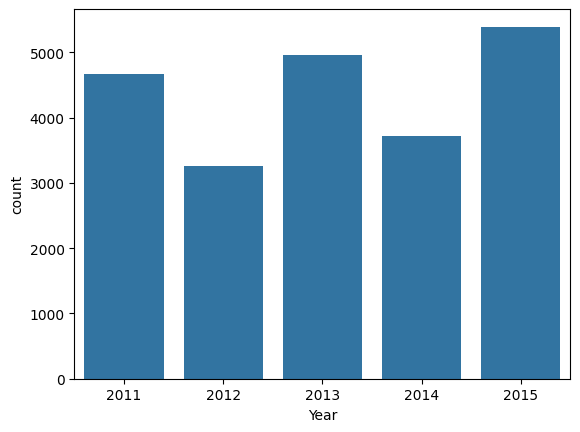

In [ ]:
sns.countplot(x="Year", data = merged_data)
plt.show()

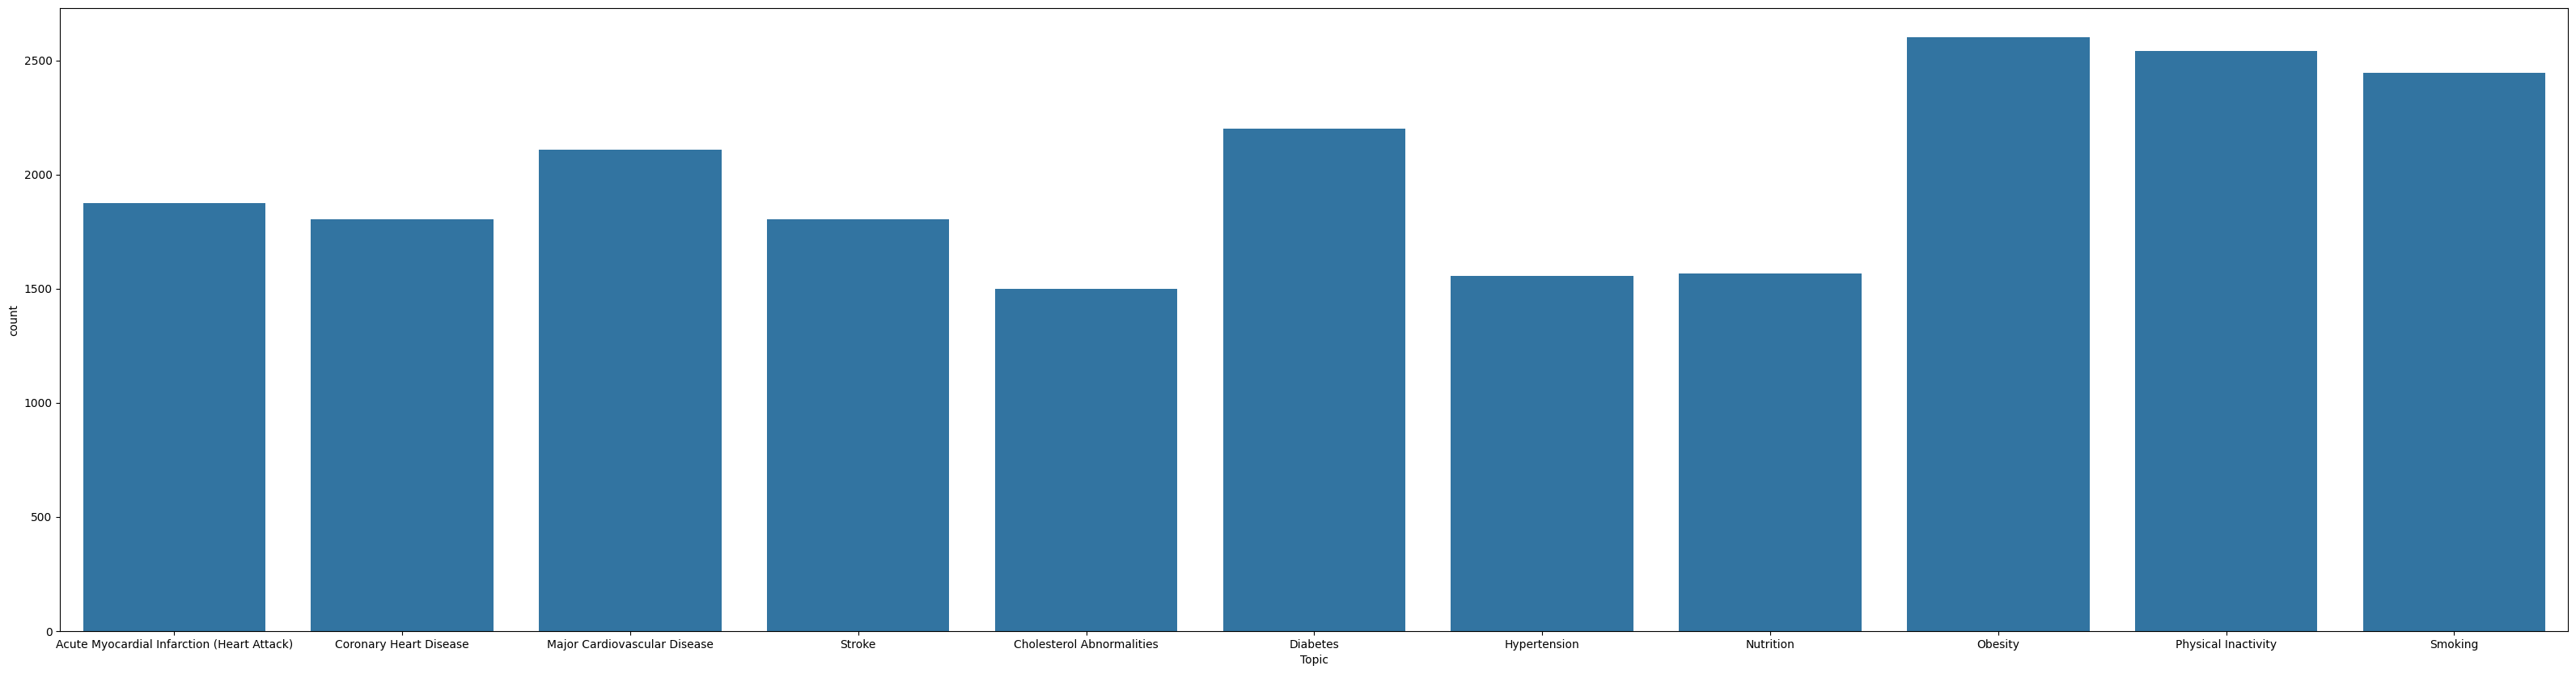

In [ ]:
plt.figure(figsize=(40,10))
sns.countplot(x="Topic", data = merged_data)
plt.show()

array([[<Axes: title={'center': 'Year'}>,
        <Axes: title={'center': 'Age-Standardized'}>,
        <Axes: title={'center': 'Crude'}>,
        <Axes: title={'center': 'NO2 Mean'}>],
       [<Axes: title={'center': 'NO2 1st Max Value'}>,
        <Axes: title={'center': 'NO2 AQI'}>,
        <Axes: title={'center': 'O3 Mean'}>,
        <Axes: title={'center': 'O3 1st Max Value'}>],
       [<Axes: title={'center': 'O3 AQI'}>,
        <Axes: title={'center': 'SO2 Mean'}>,
        <Axes: title={'center': 'SO2 1st Max Value'}>,
        <Axes: title={'center': 'SO2 AQI'}>],
       [<Axes: title={'center': 'CO Mean'}>,
        <Axes: title={'center': 'CO 1st Max Value'}>,
        <Axes: title={'center': 'CO AQI'}>, <Axes: >]], dtype=object)

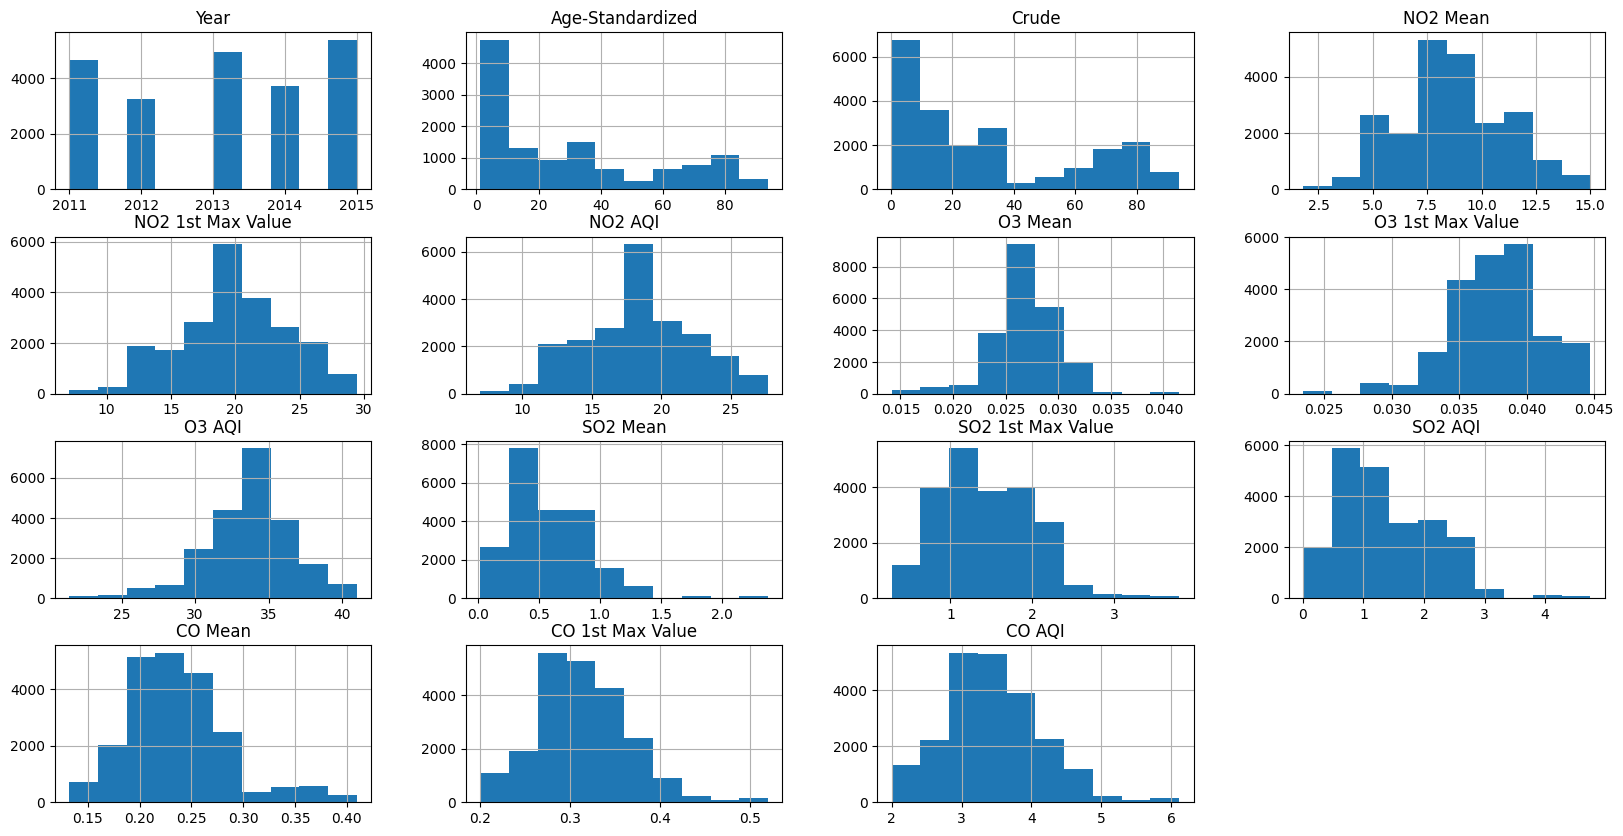

In [ ]:
merged_data.hist(figsize=(20,10))

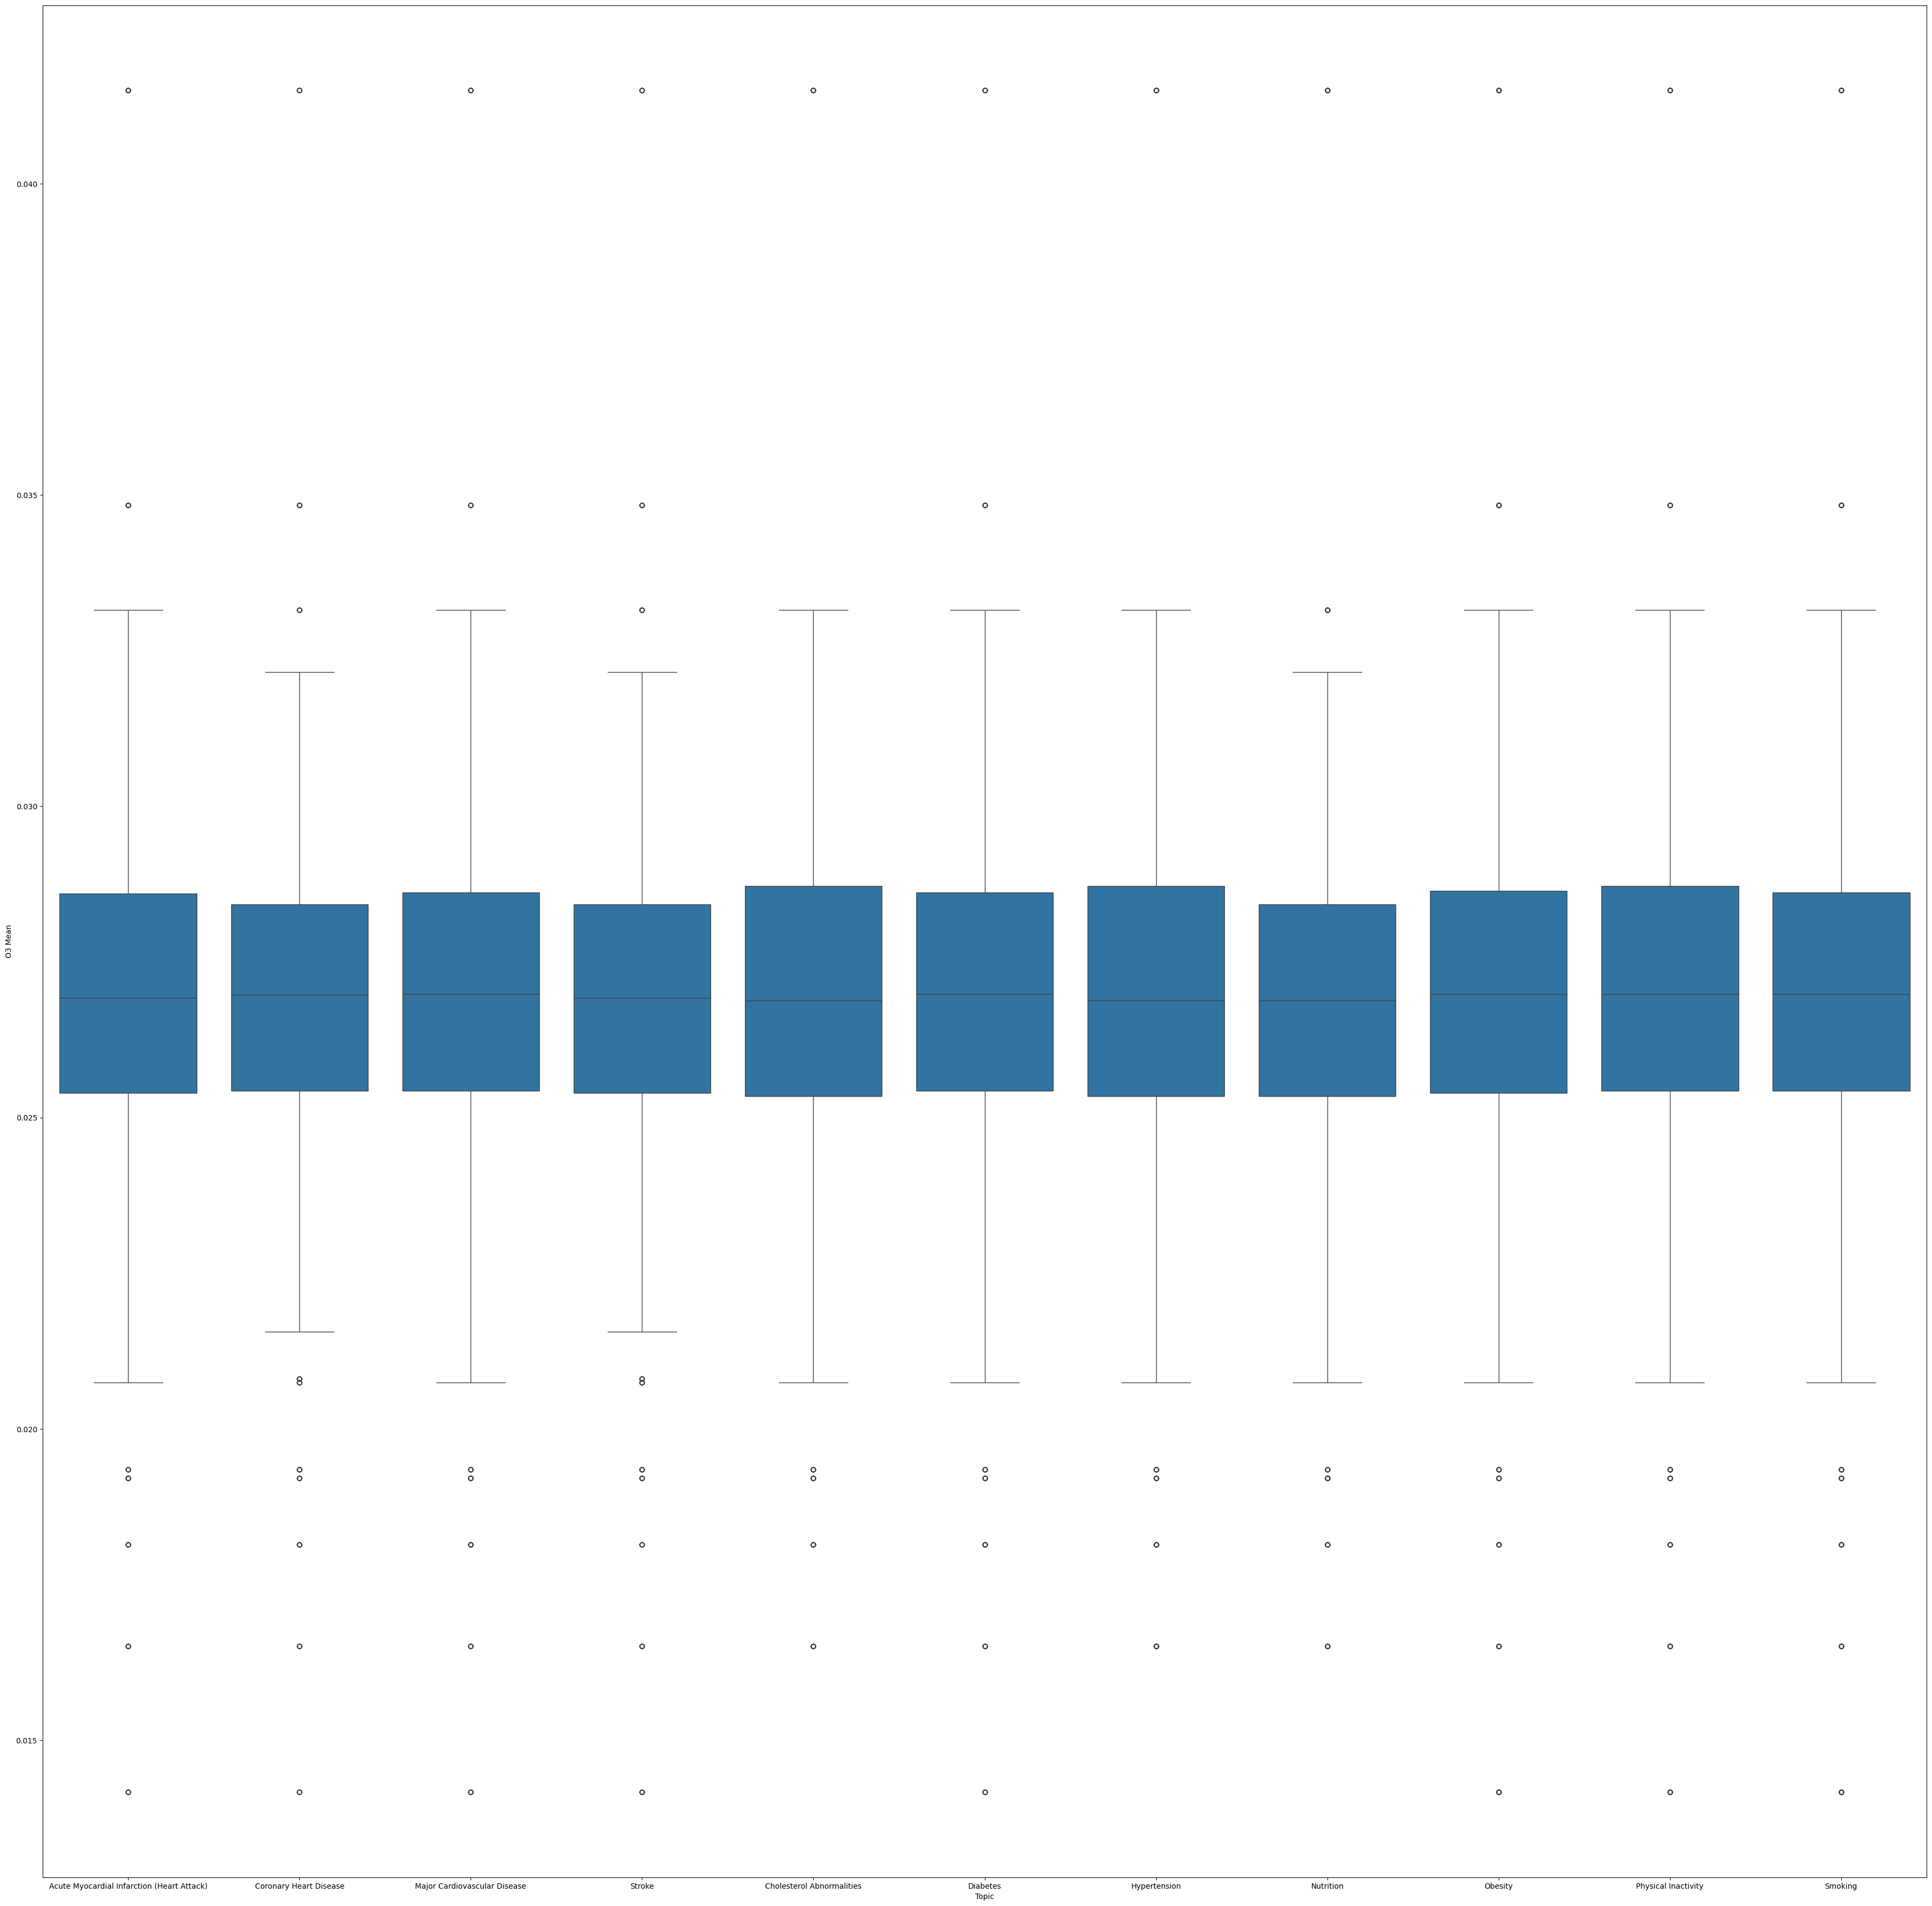

In [ ]:
plt.figure(figsize= (45,45))
sns.boxplot(x="Topic", y = "O3 Mean", data = merged_data)
plt.show()

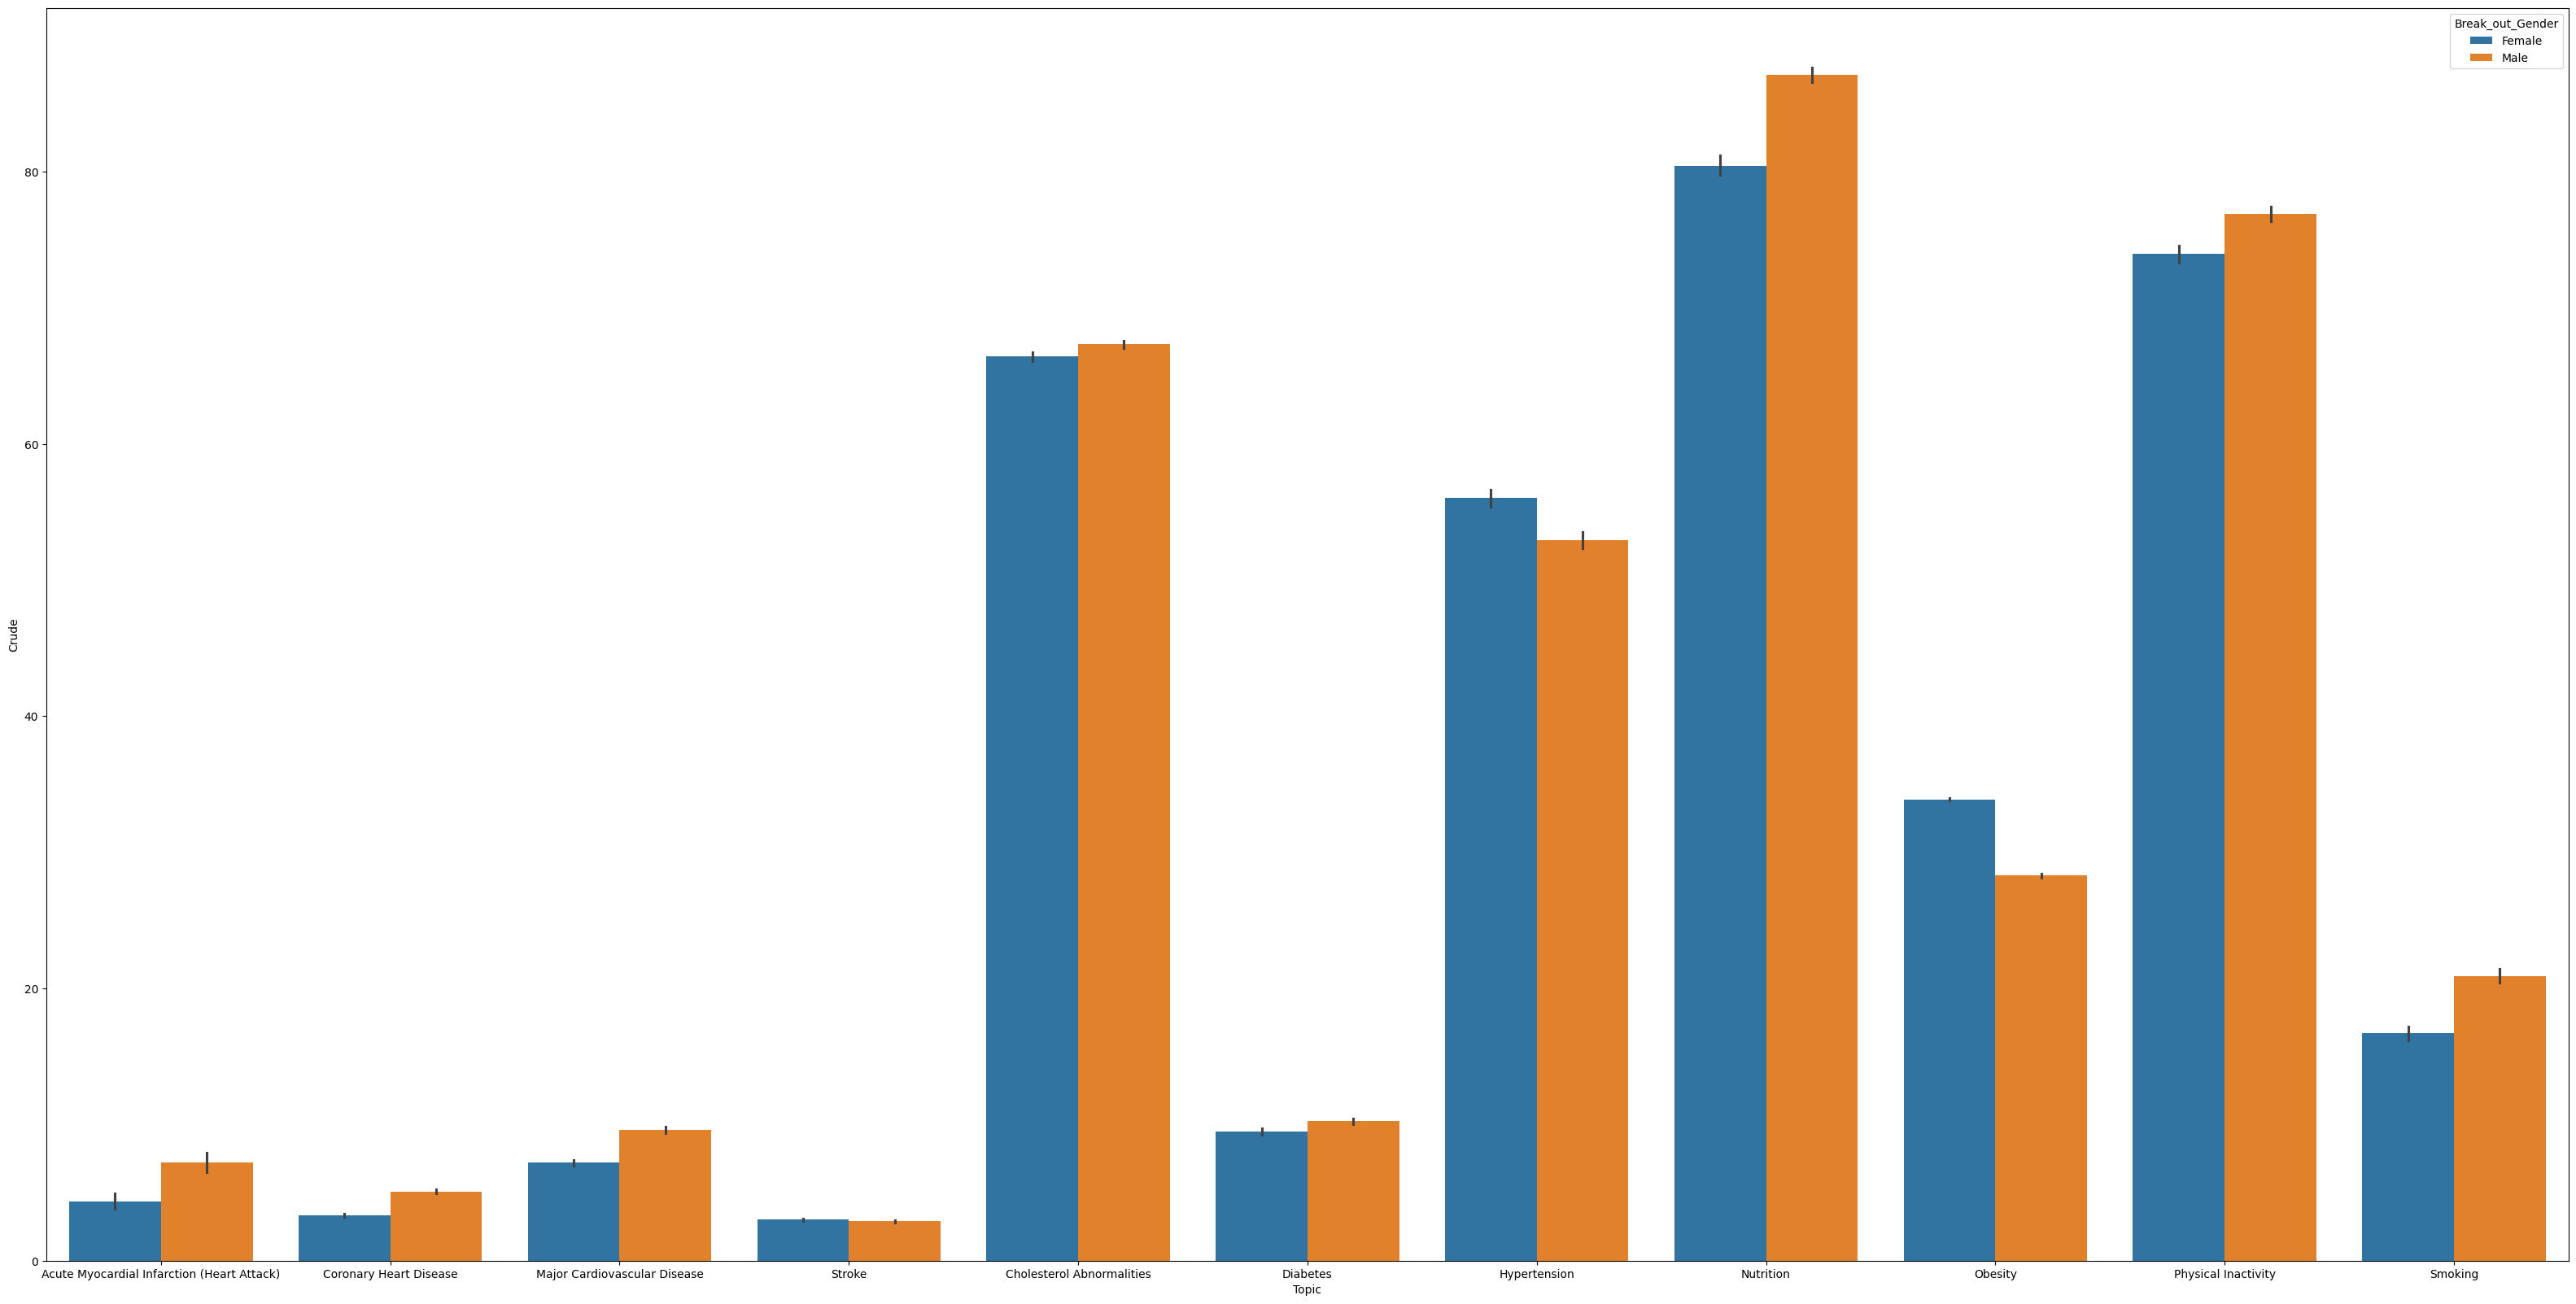

In [ ]:
#barplot of crude percentage for each type of disase based on gender.
plt.figure(figsize = (40,20))
sns.barplot(x = "Topic", y = "Crude", data = merged_data, hue =  "Break_out_Gender")
plt.show()

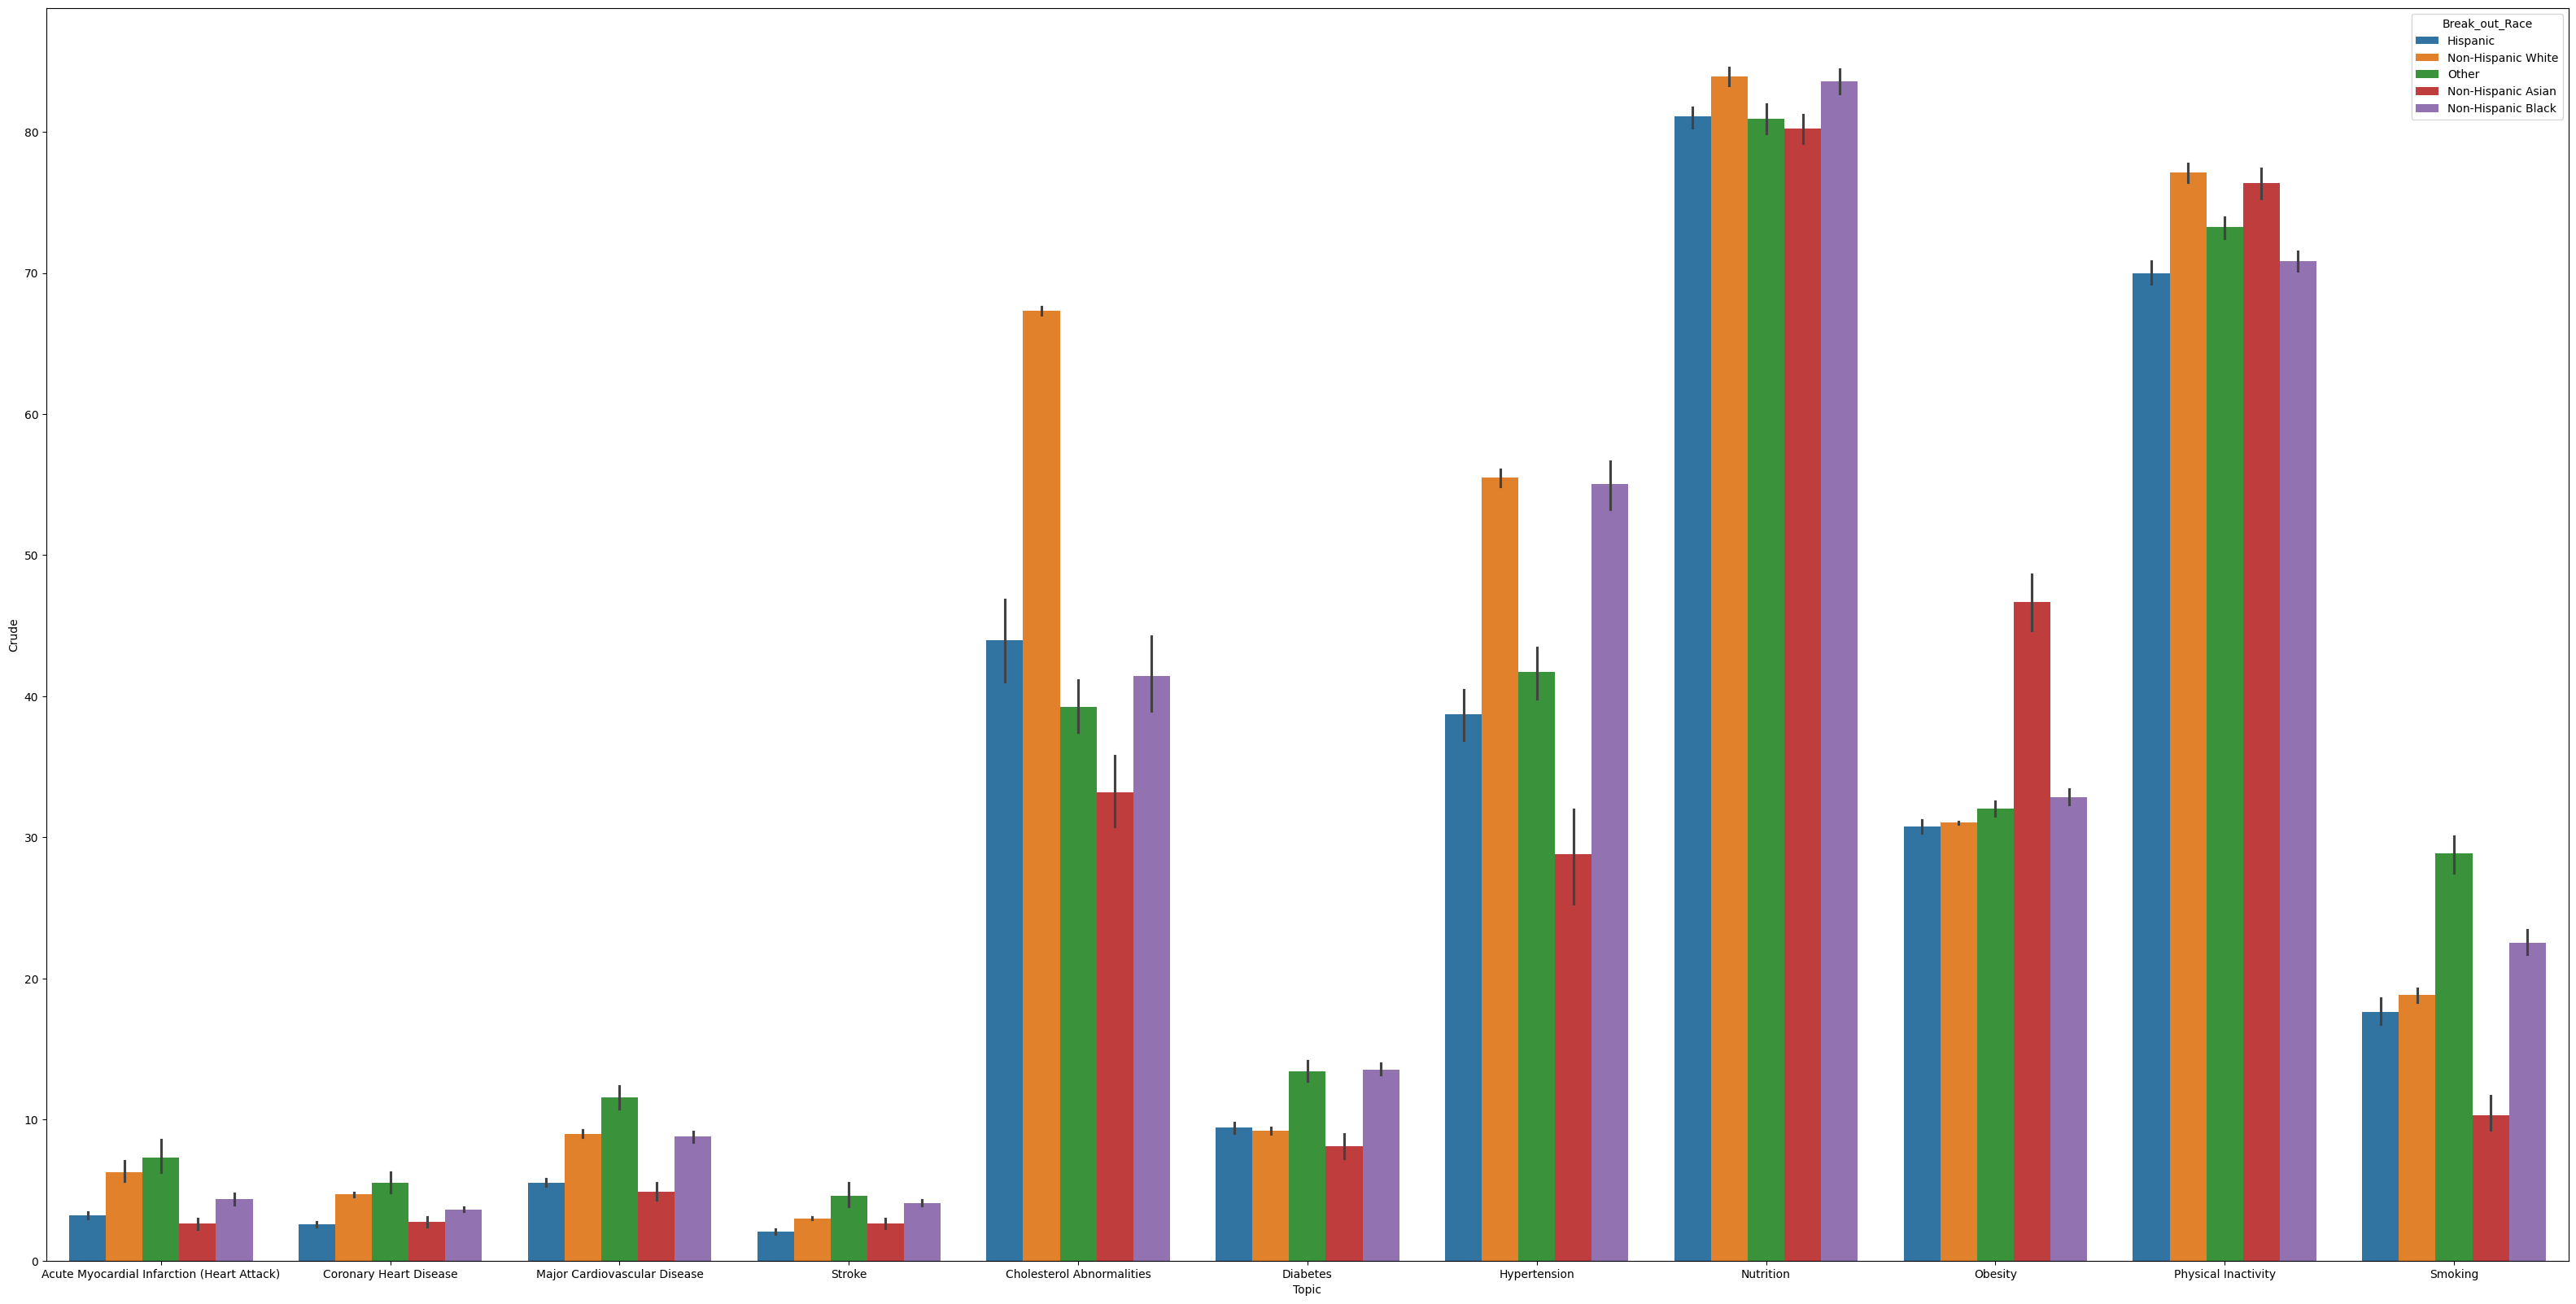

In [ ]:
#Crude percentages of disease type sorted by race.
plt.figure(figsize = (40,20))
sns.barplot(x = "Topic", y = "Crude", data = merged_data, hue =  "Break_out_Race")
plt.show()

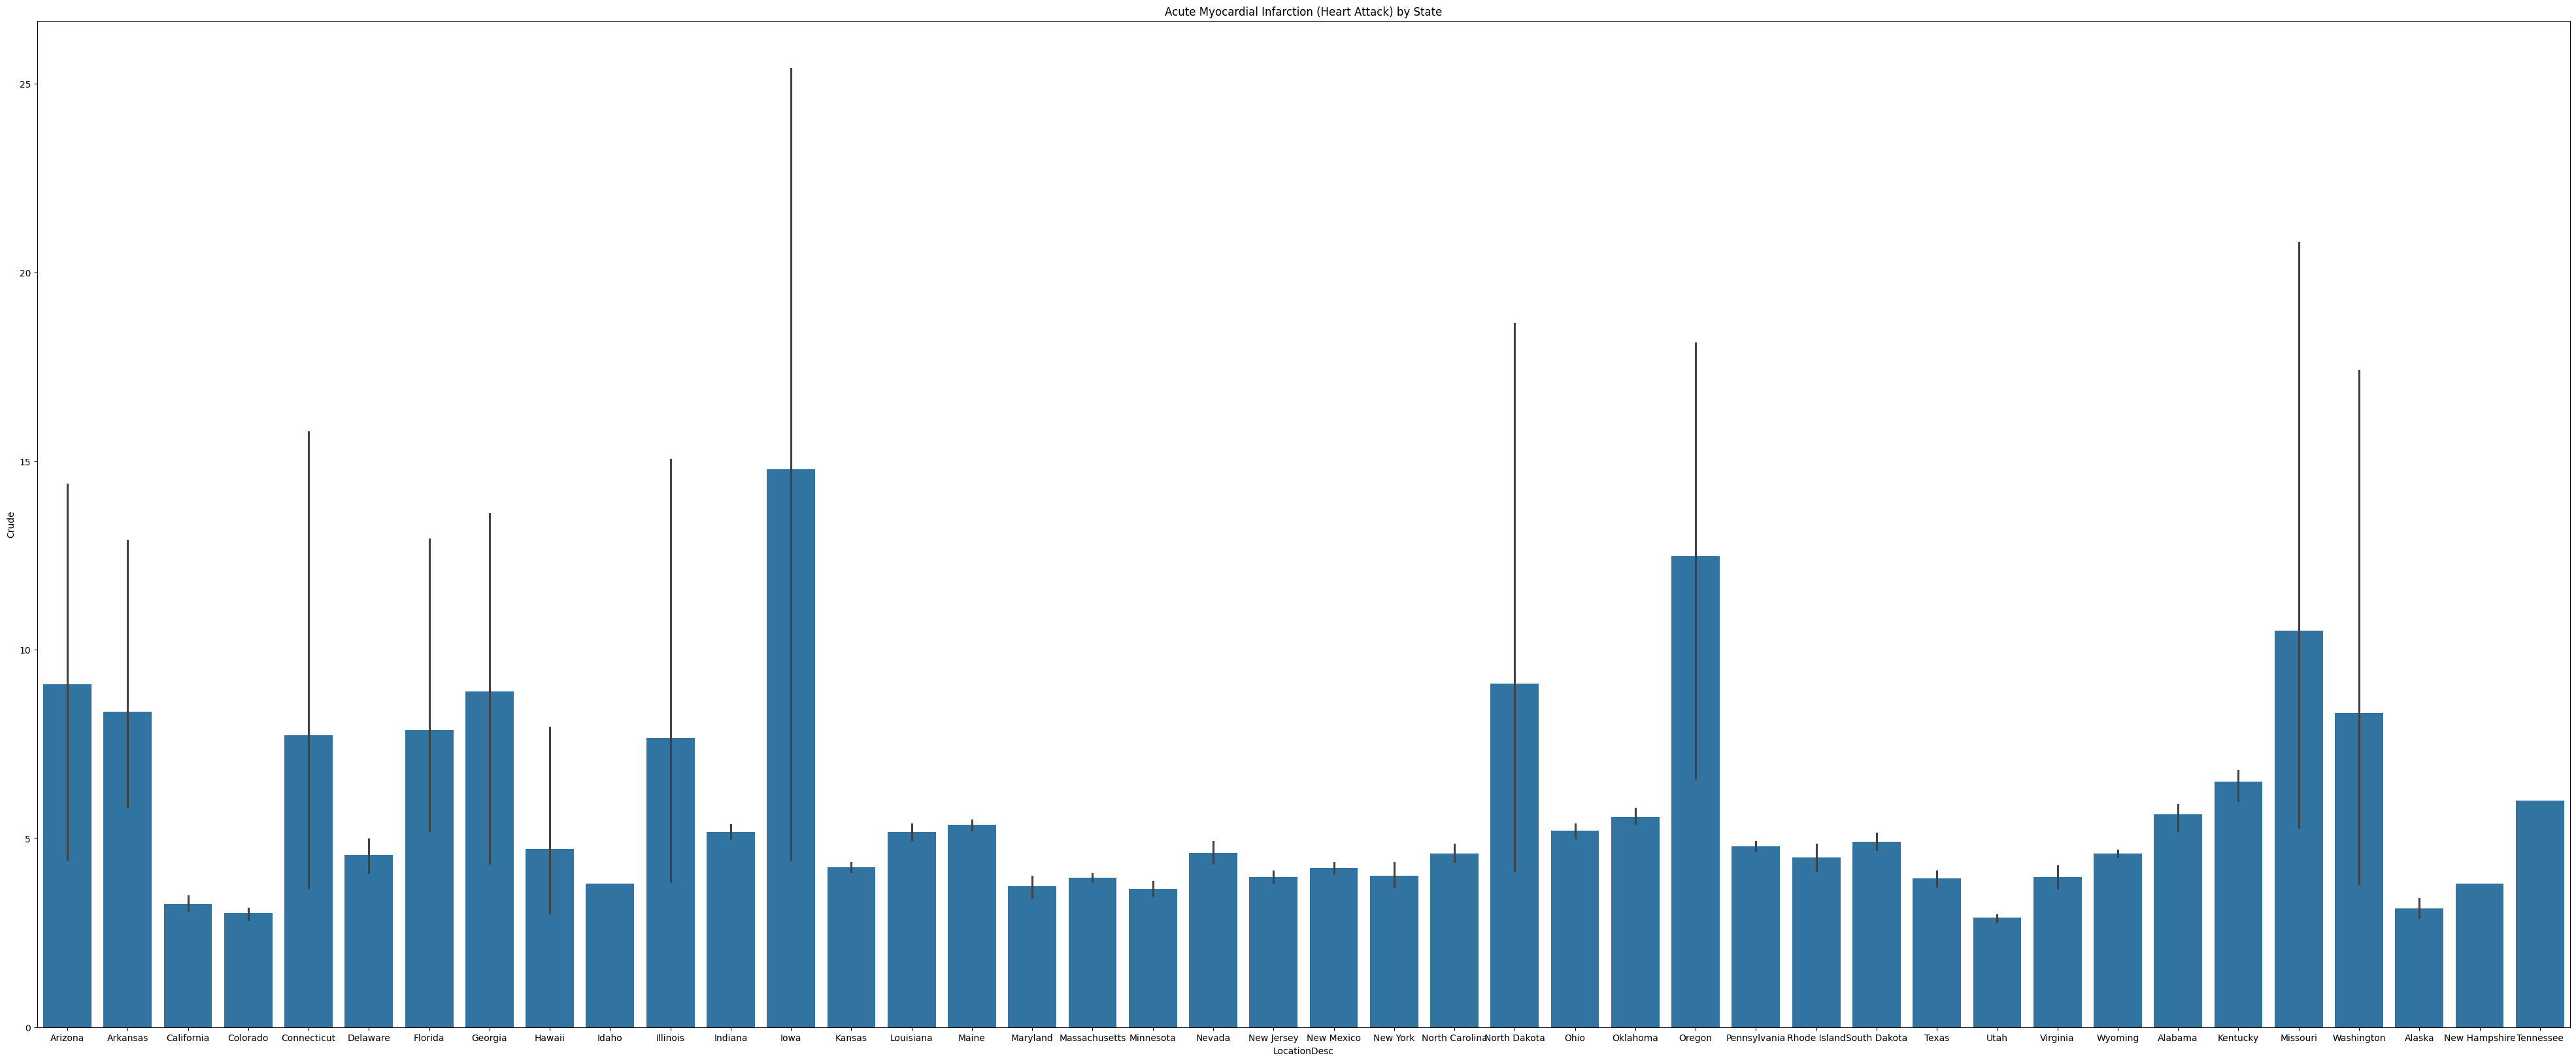

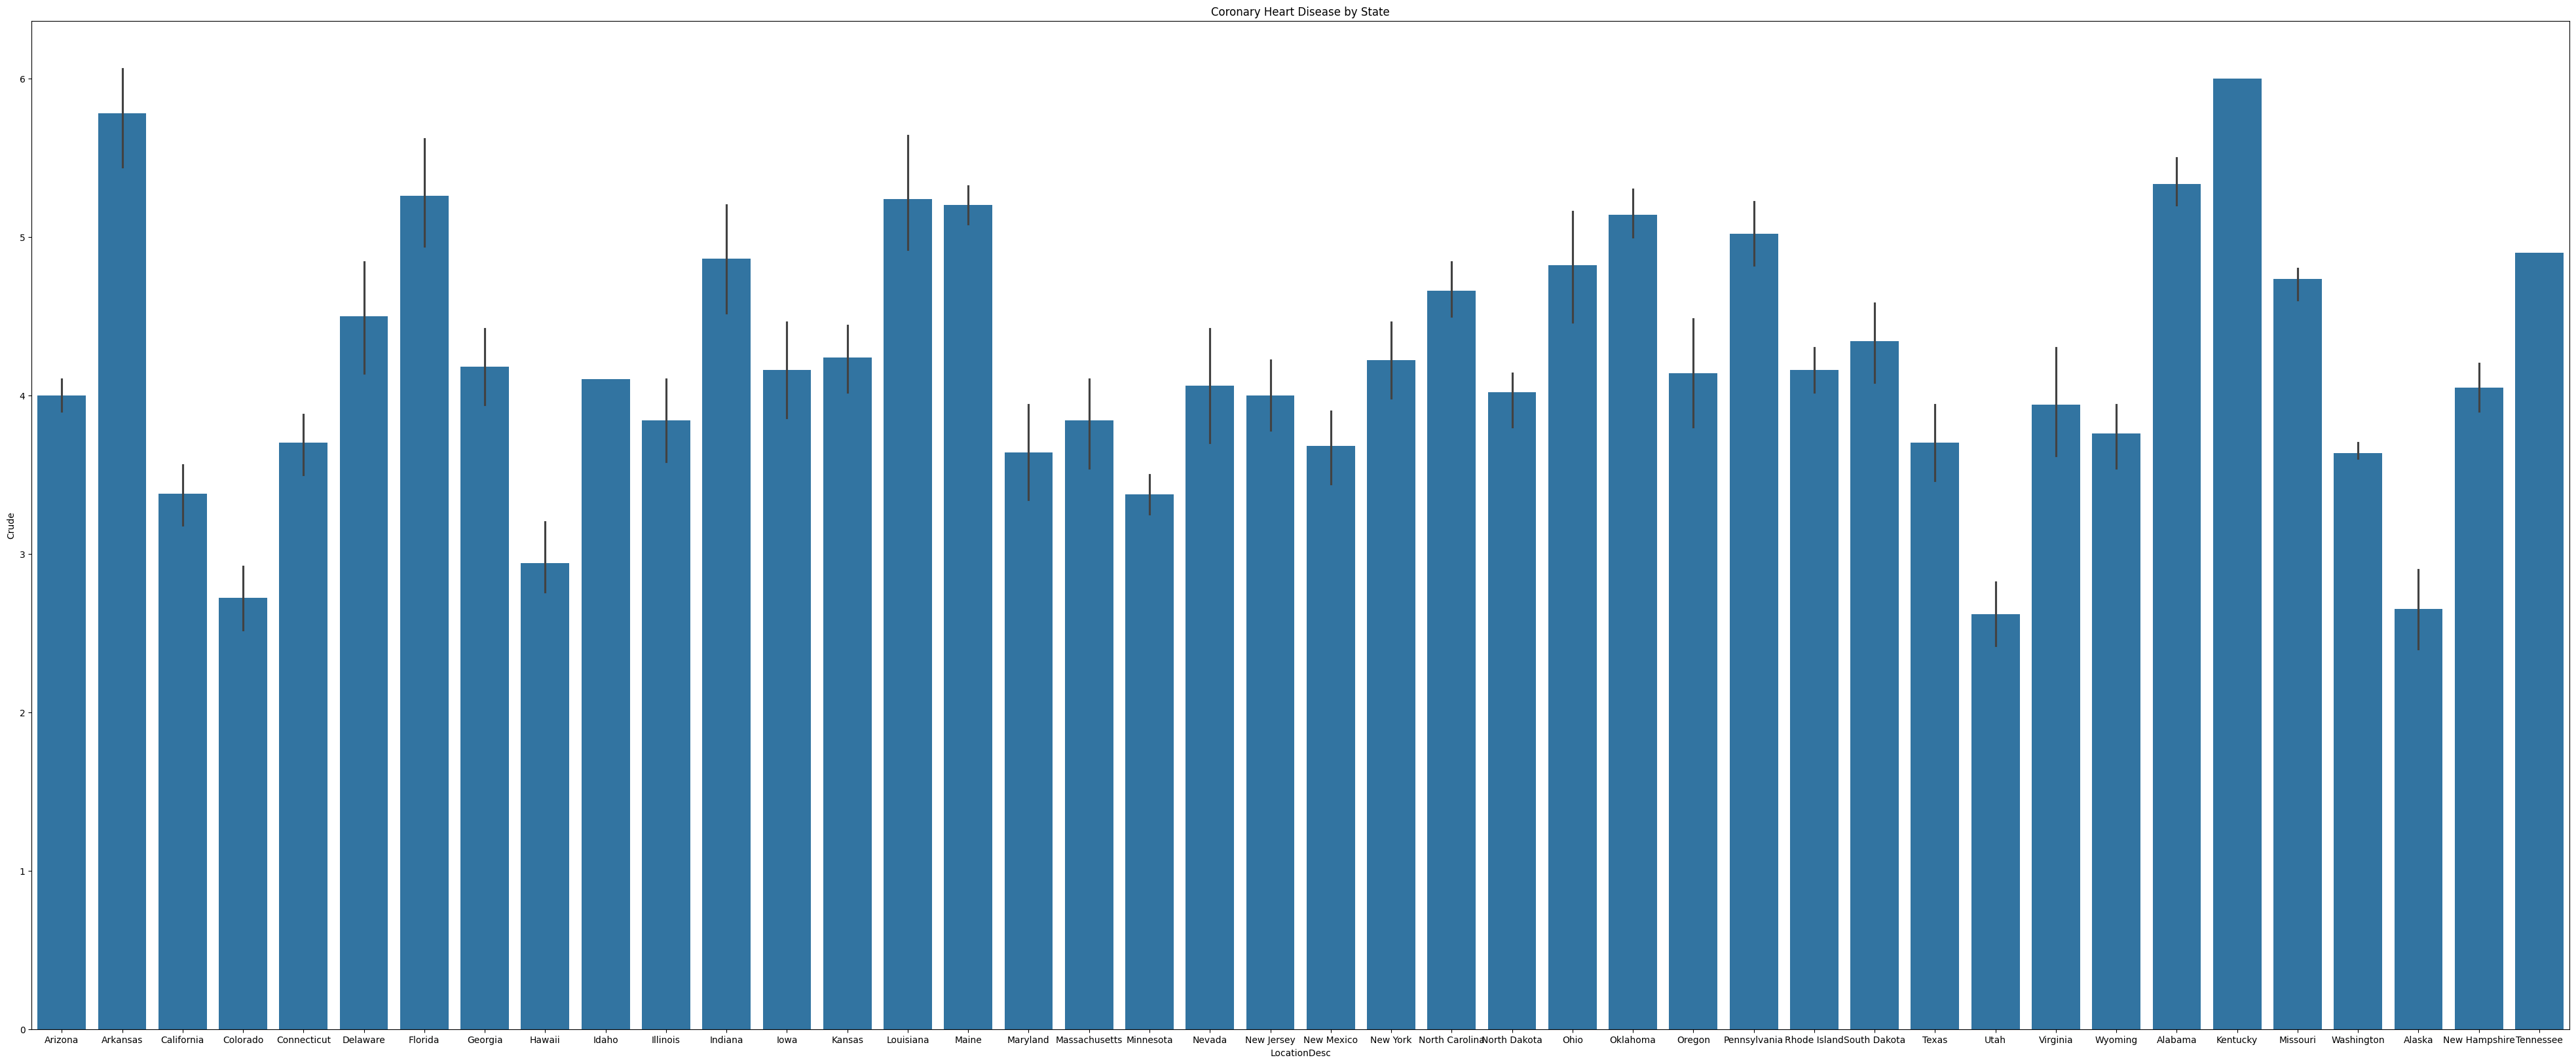

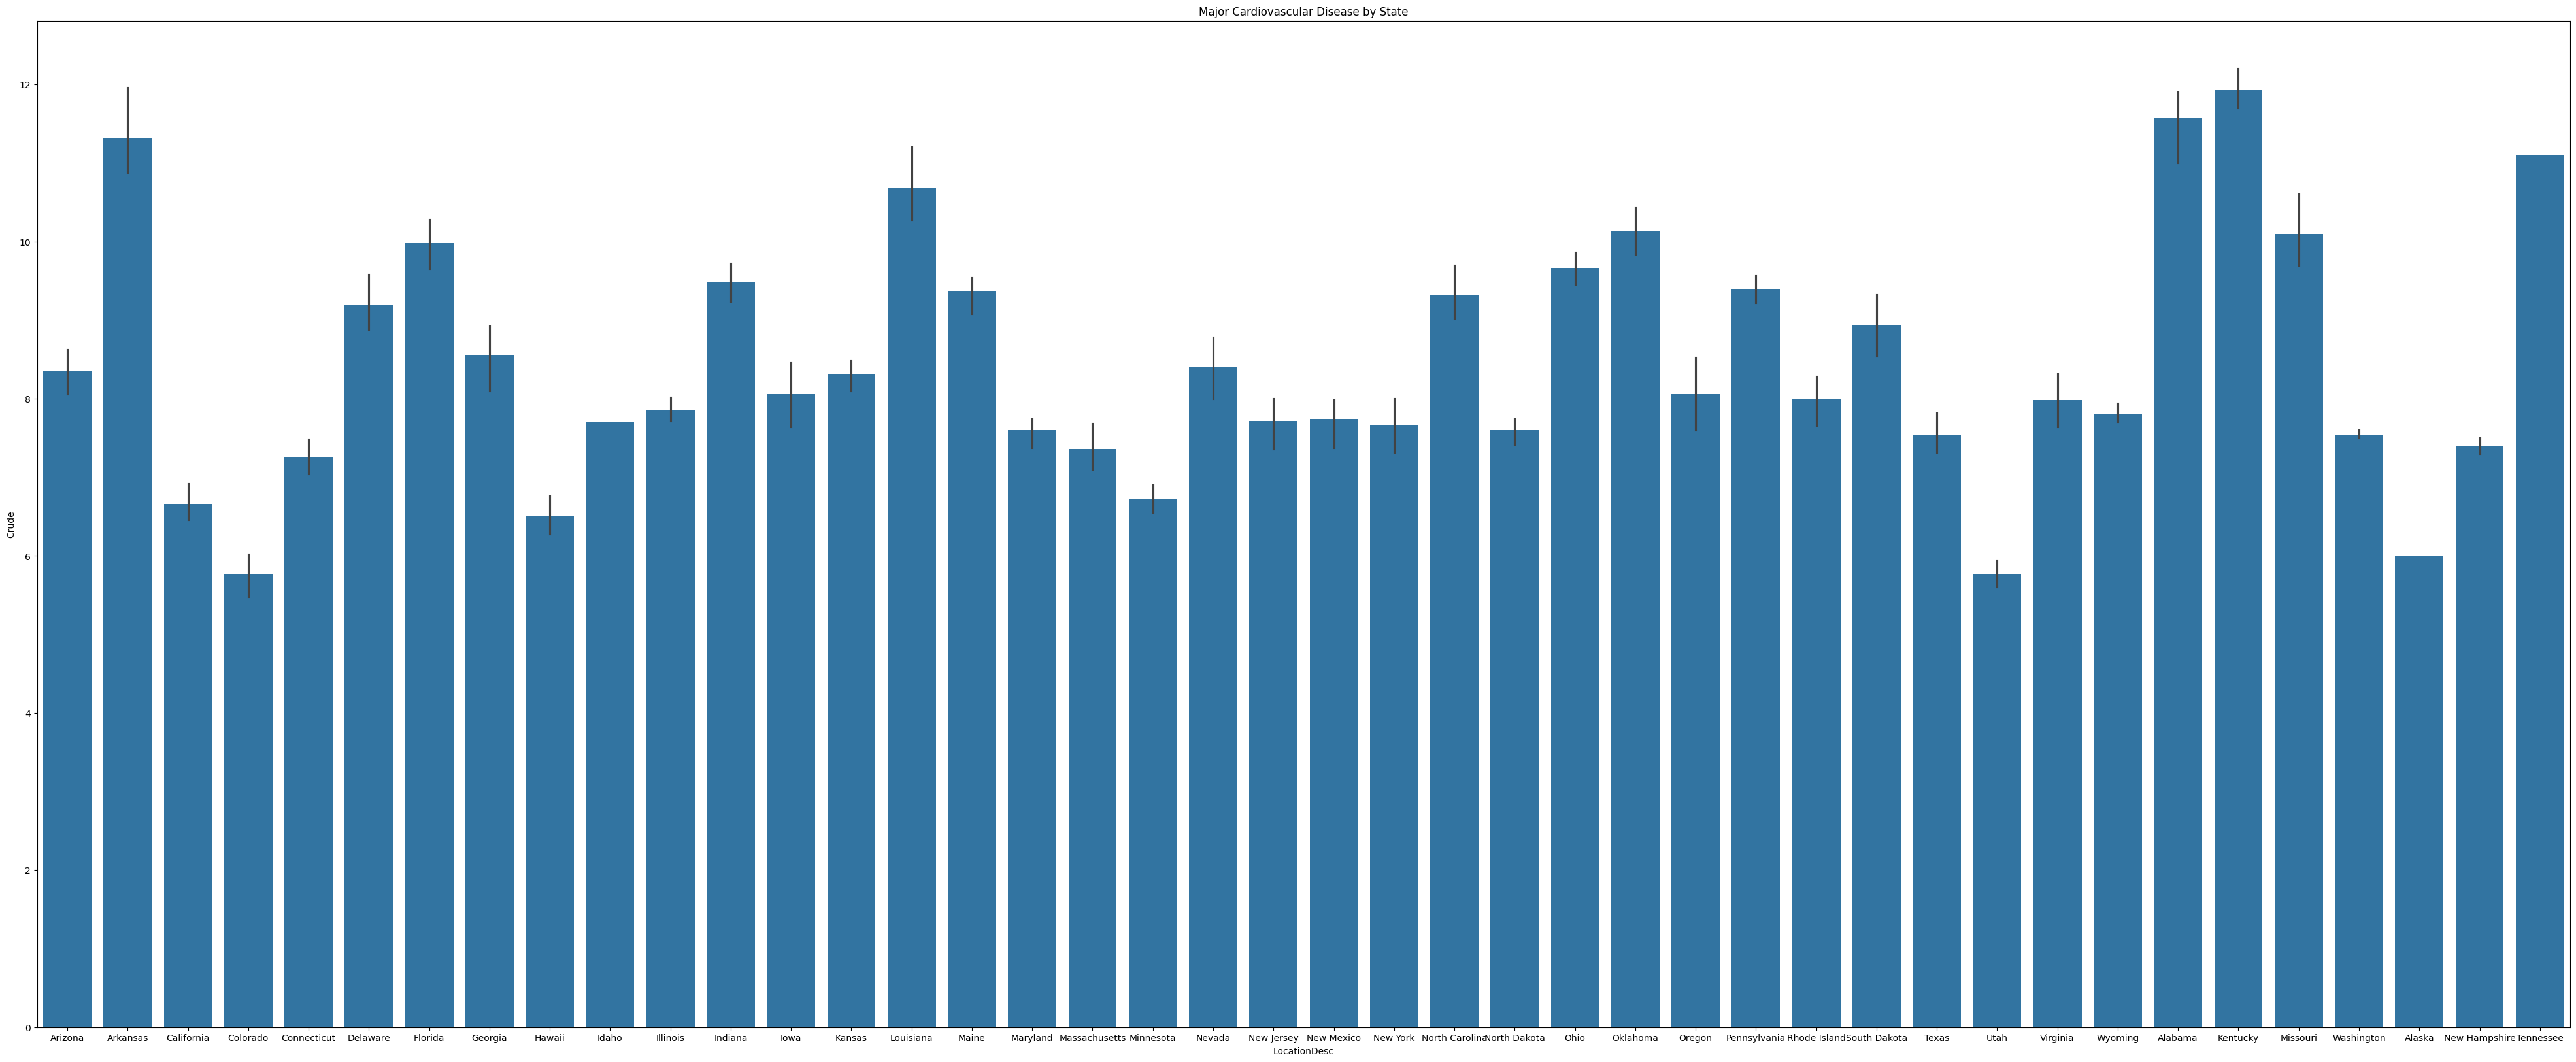

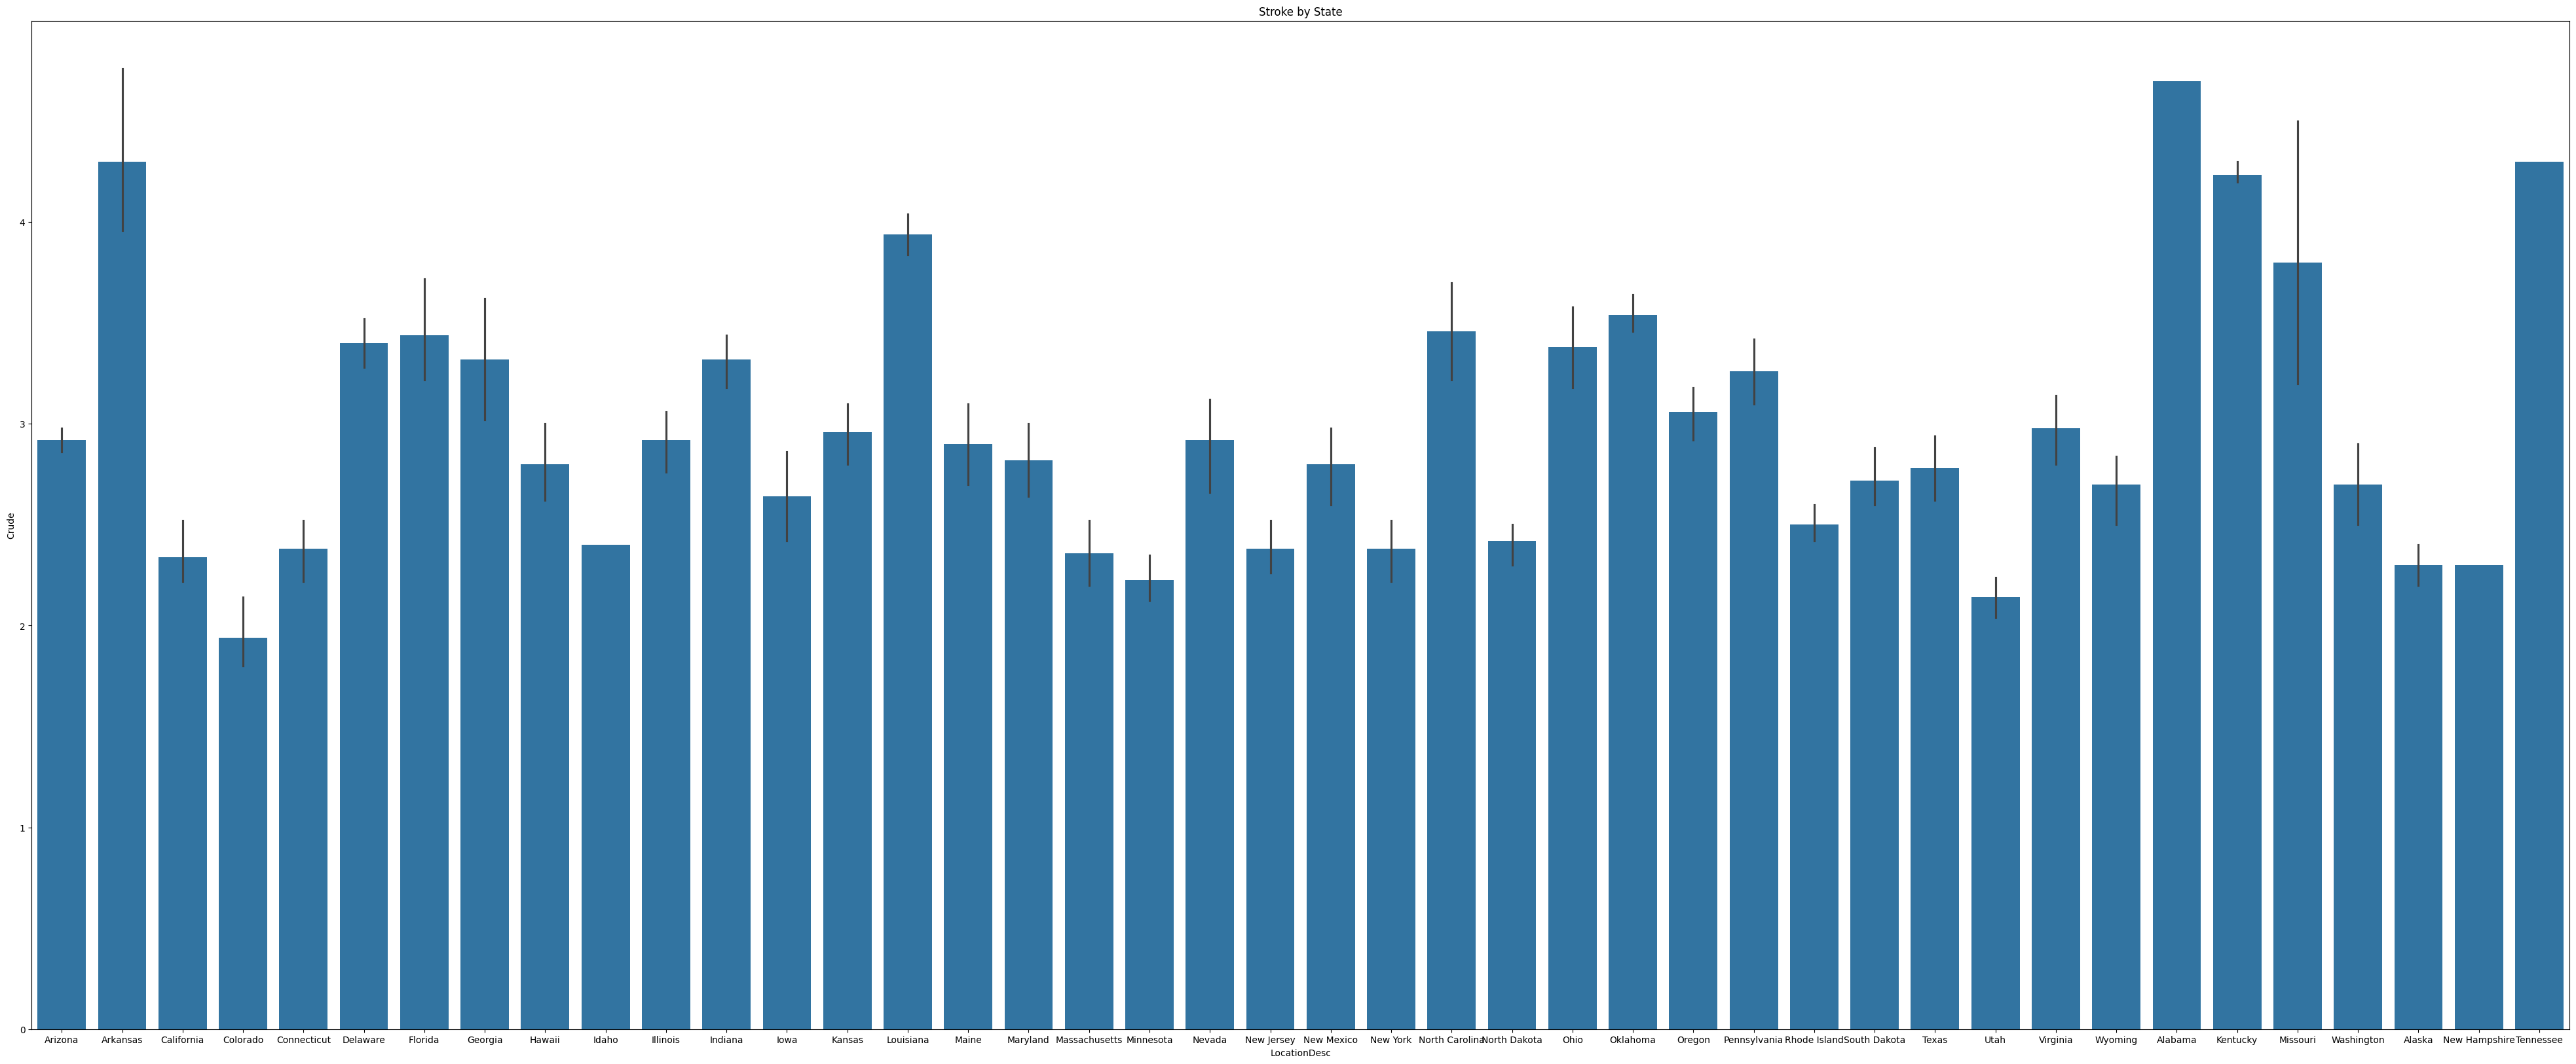

In [ ]:
# Cardiovascular Diseases by State

plt.figure(figsize = (50,20))
plt.title("Acute Myocardial Infarction (Heart Attack) by State")
sns.barplot(x = "LocationDesc", y = "Crude", data = merged_data[(merged_data["Topic"] == "Acute Myocardial Infarction (Heart Attack)") & (merged_data["Break_out_Overall"].notna())])
plt.show()
plt.figure(figsize = (50,20))
plt.title("Coronary Heart Disease by State")
sns.barplot(x = "LocationDesc", y = "Crude", data = merged_data[(merged_data["Topic"] == "Coronary Heart Disease") & (merged_data["Break_out_Overall"].notna())])
plt.show()
plt.figure(figsize = (50,20))
plt.title("Major Cardiovascular Disease by State")
sns.barplot(x = "LocationDesc", y = "Crude", data = merged_data[(merged_data["Topic"] == "Major Cardiovascular Disease") & (merged_data["Break_out_Overall"].notna())])
plt.show()
plt.figure(figsize = (50,20))
plt.title("Stroke by State")
sns.barplot(x = "LocationDesc", y = "Crude", data = merged_data[(merged_data["Topic"] == "Stroke") & (merged_data["Break_out_Overall"].notna())])
plt.show()

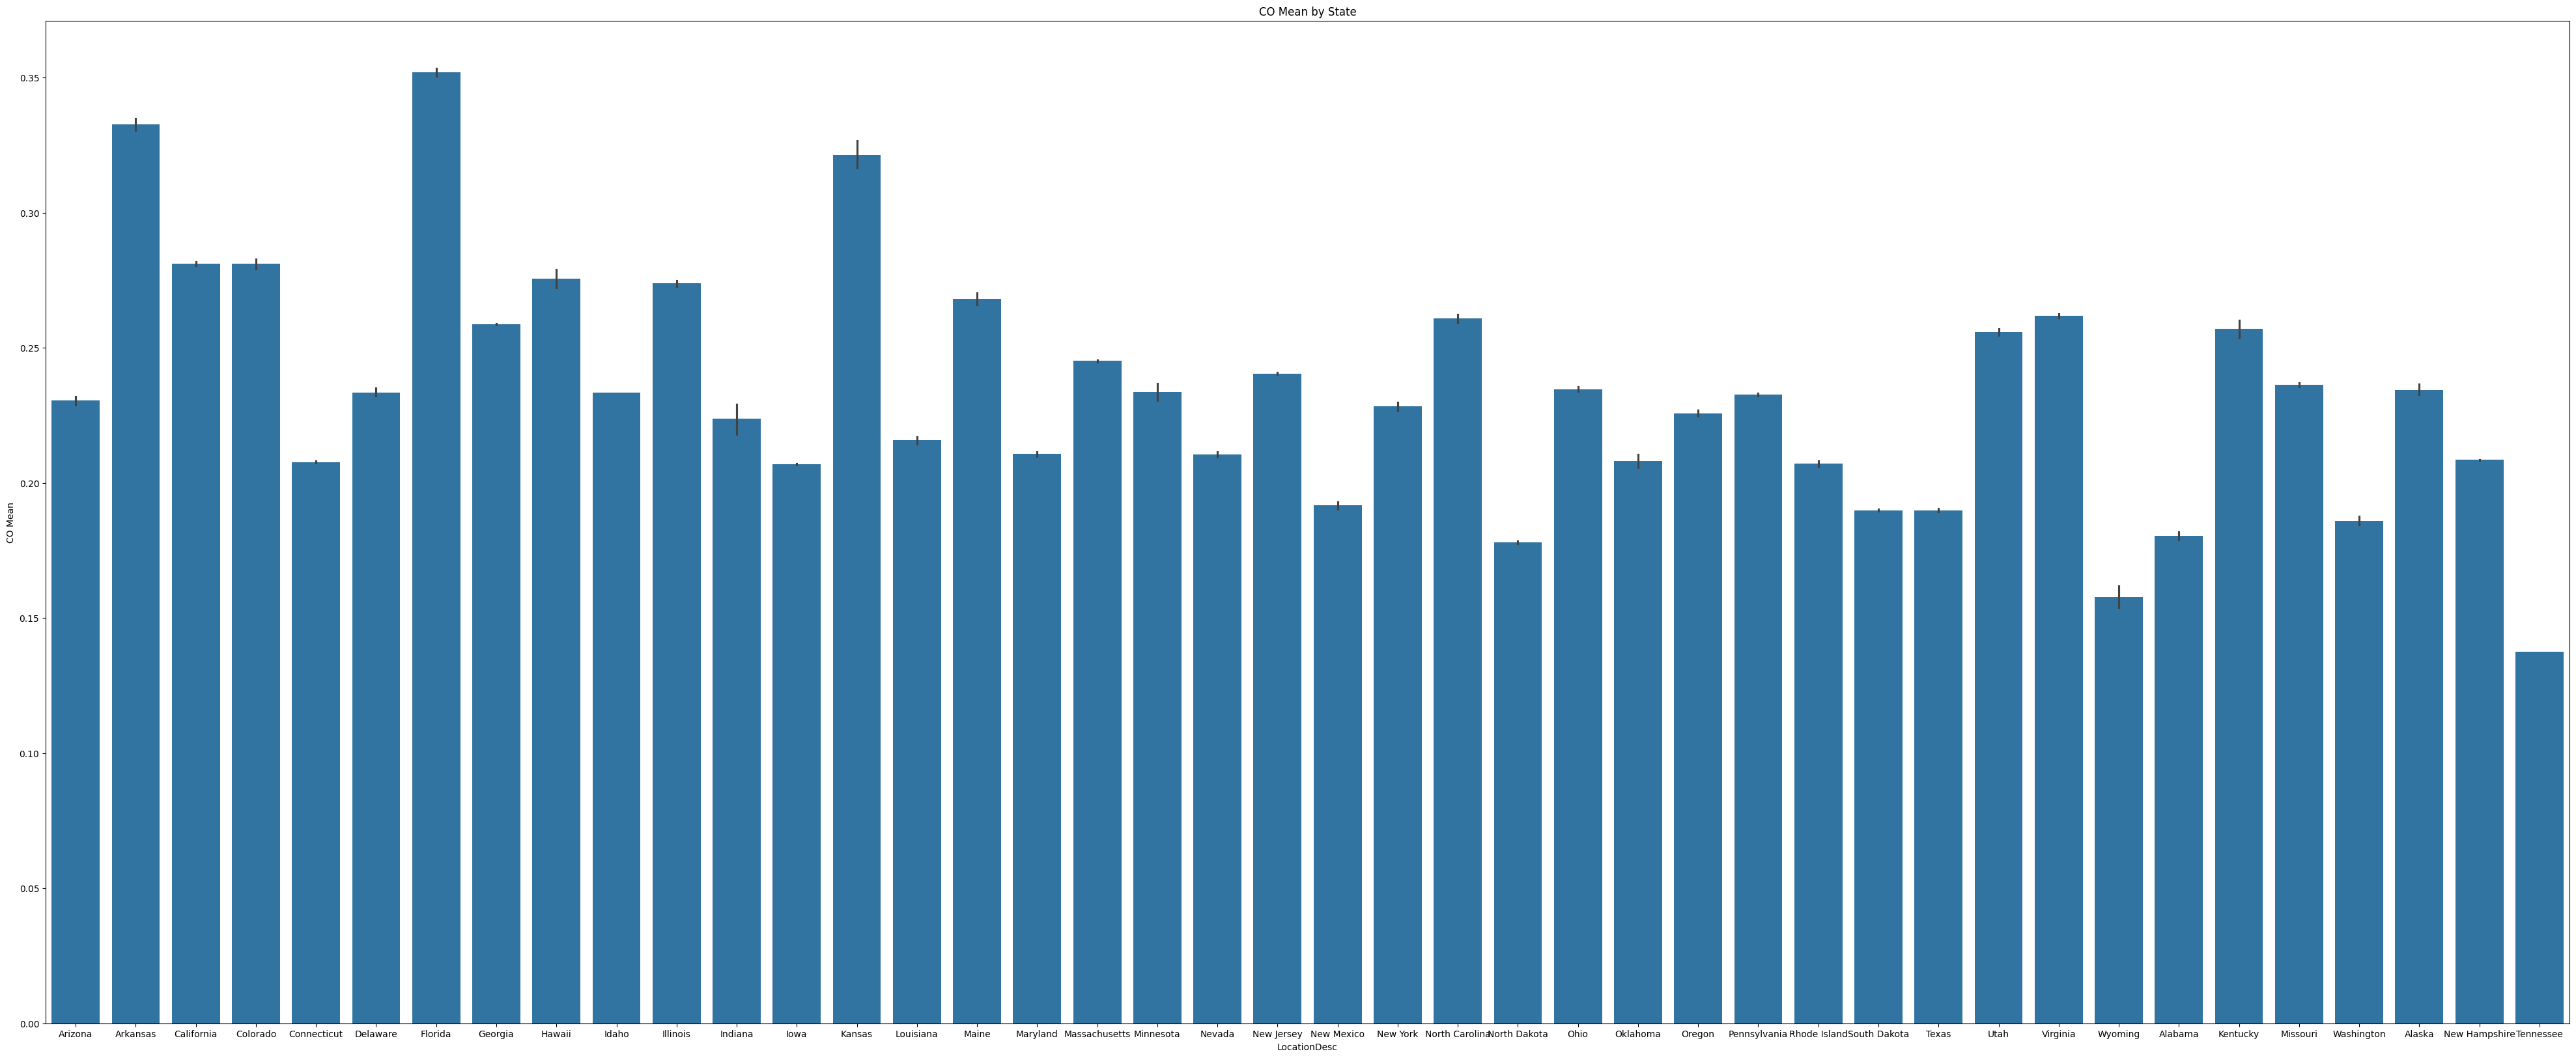

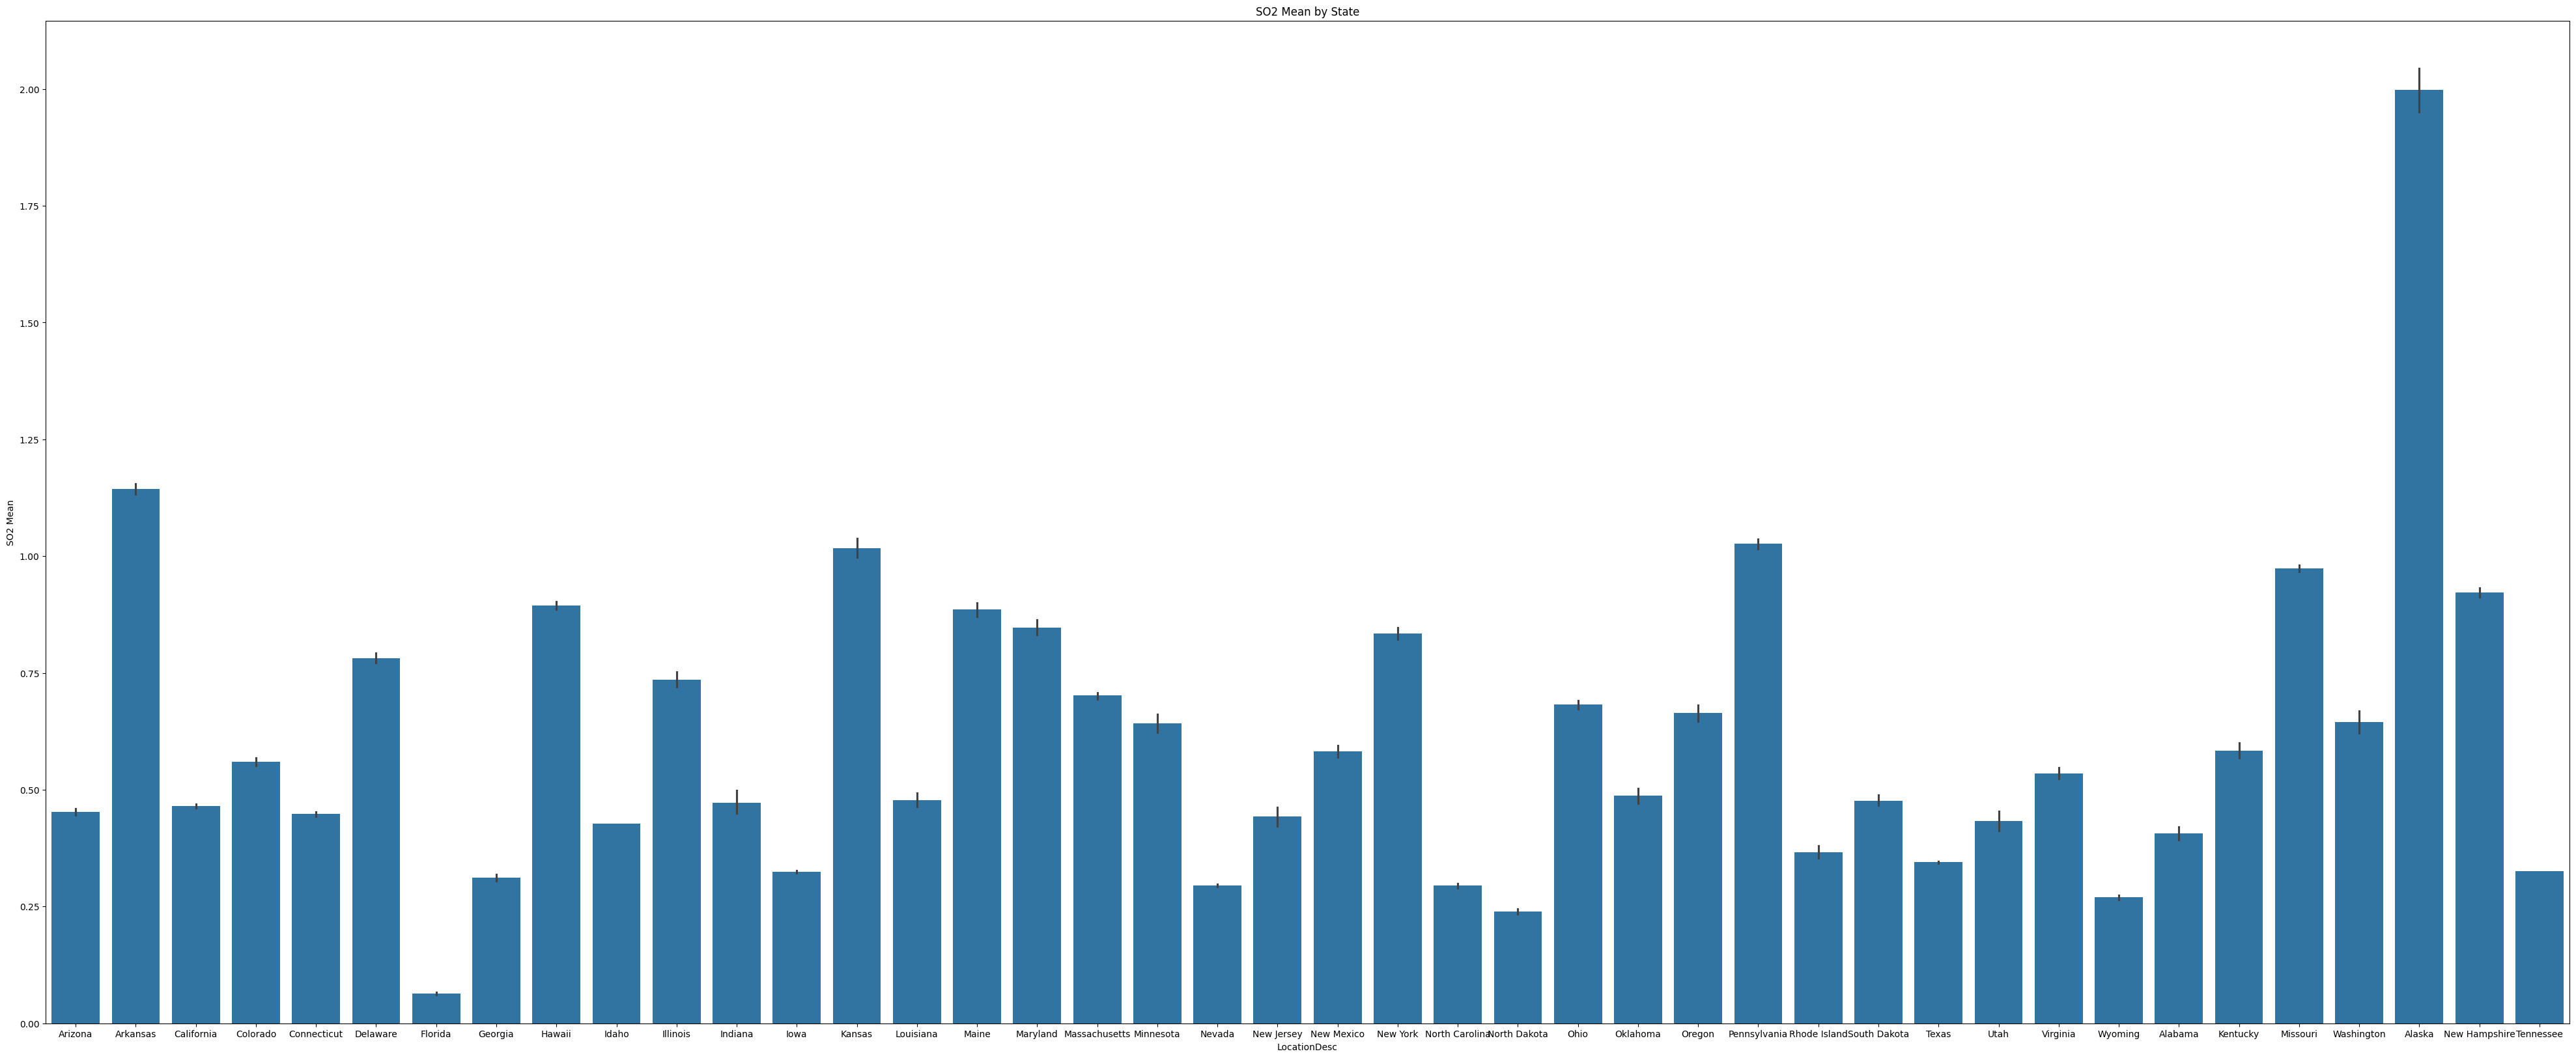

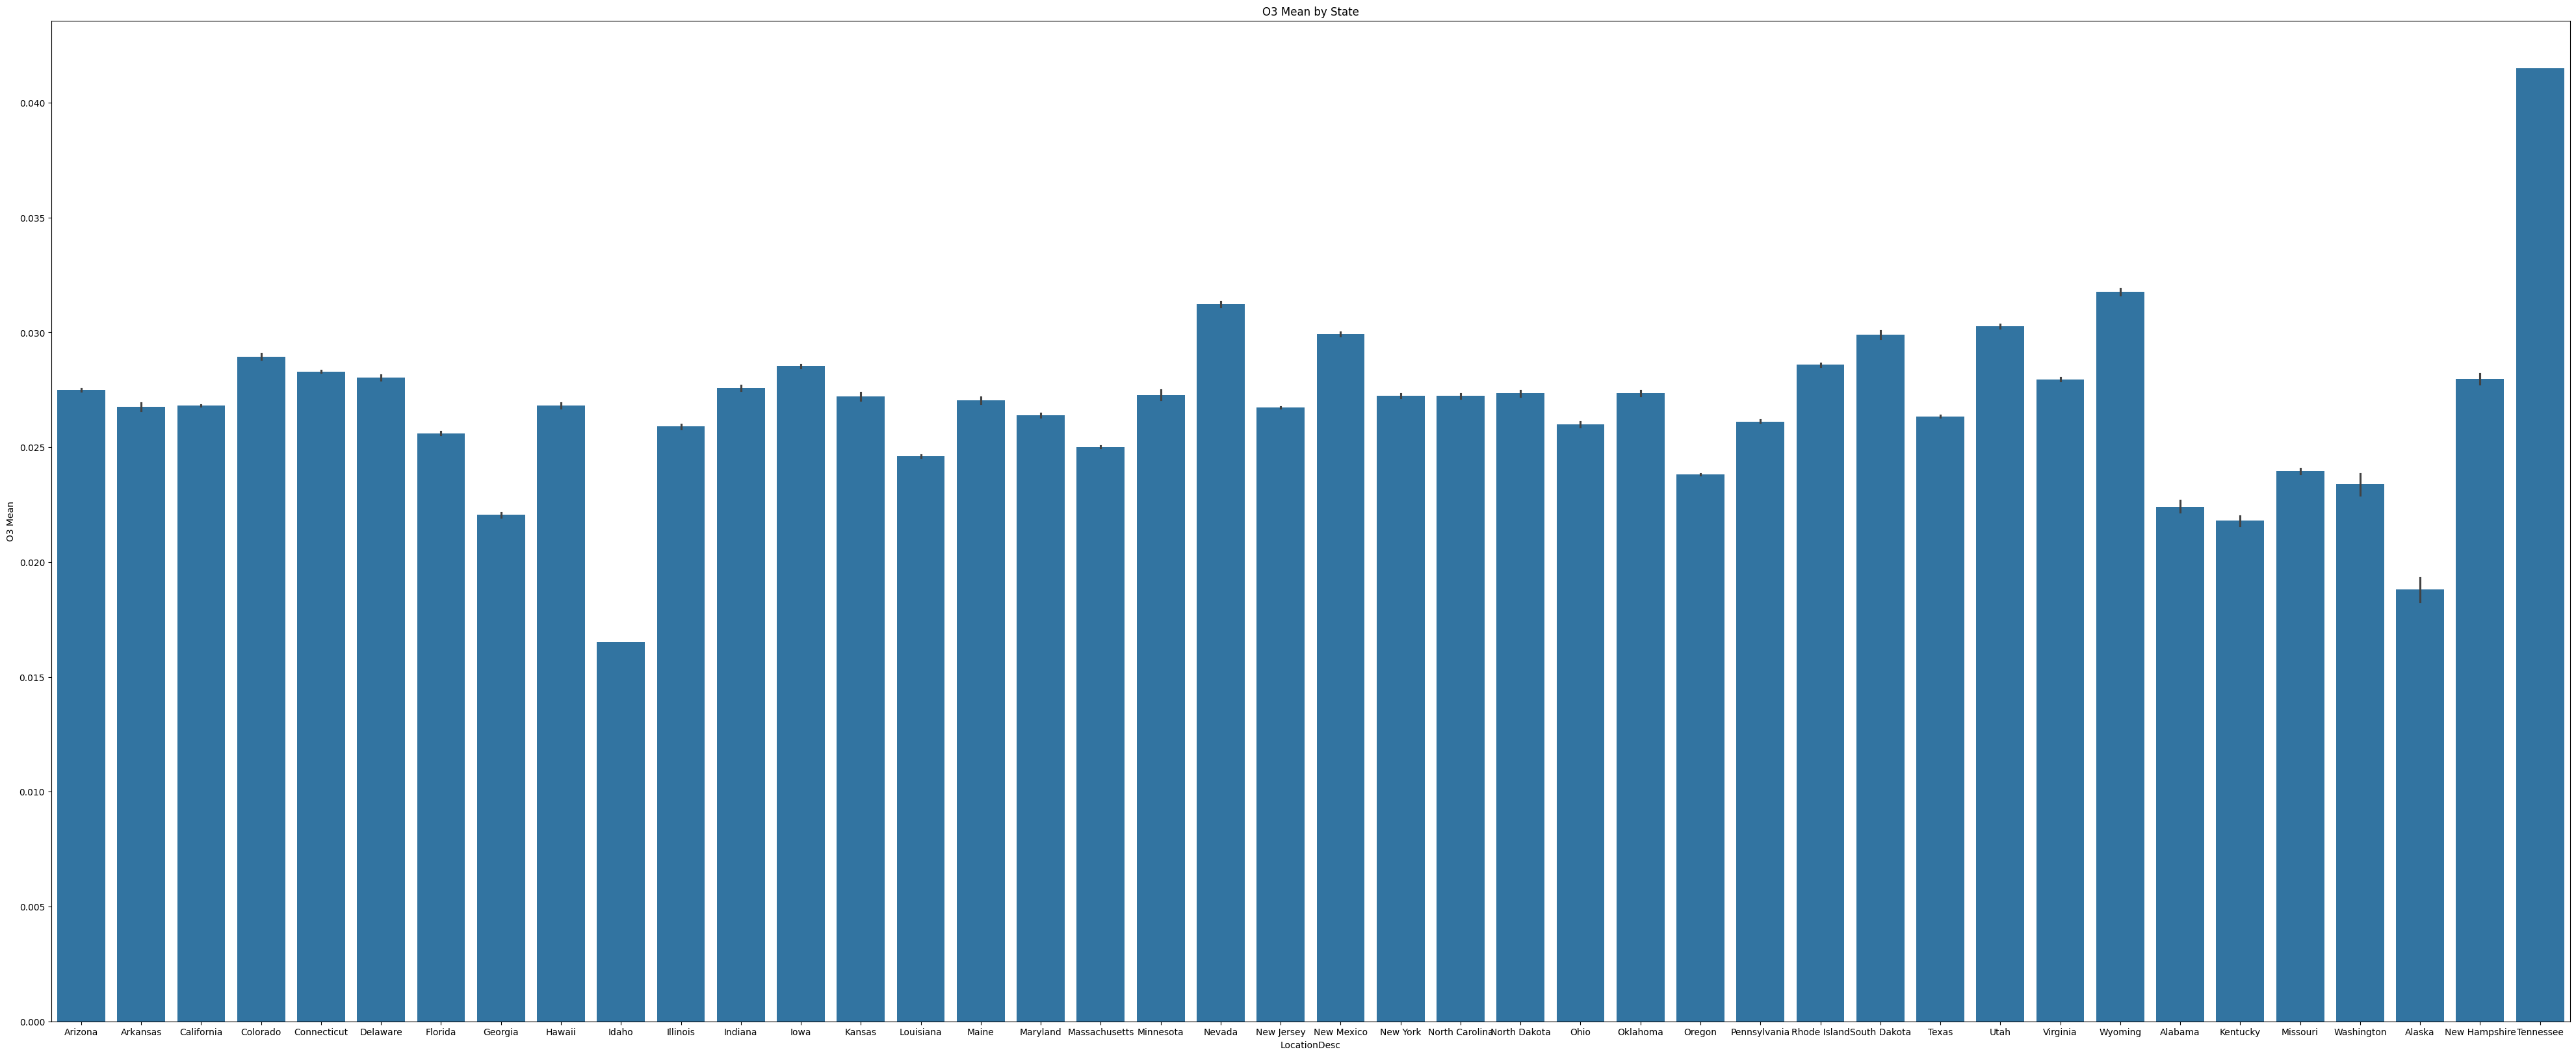

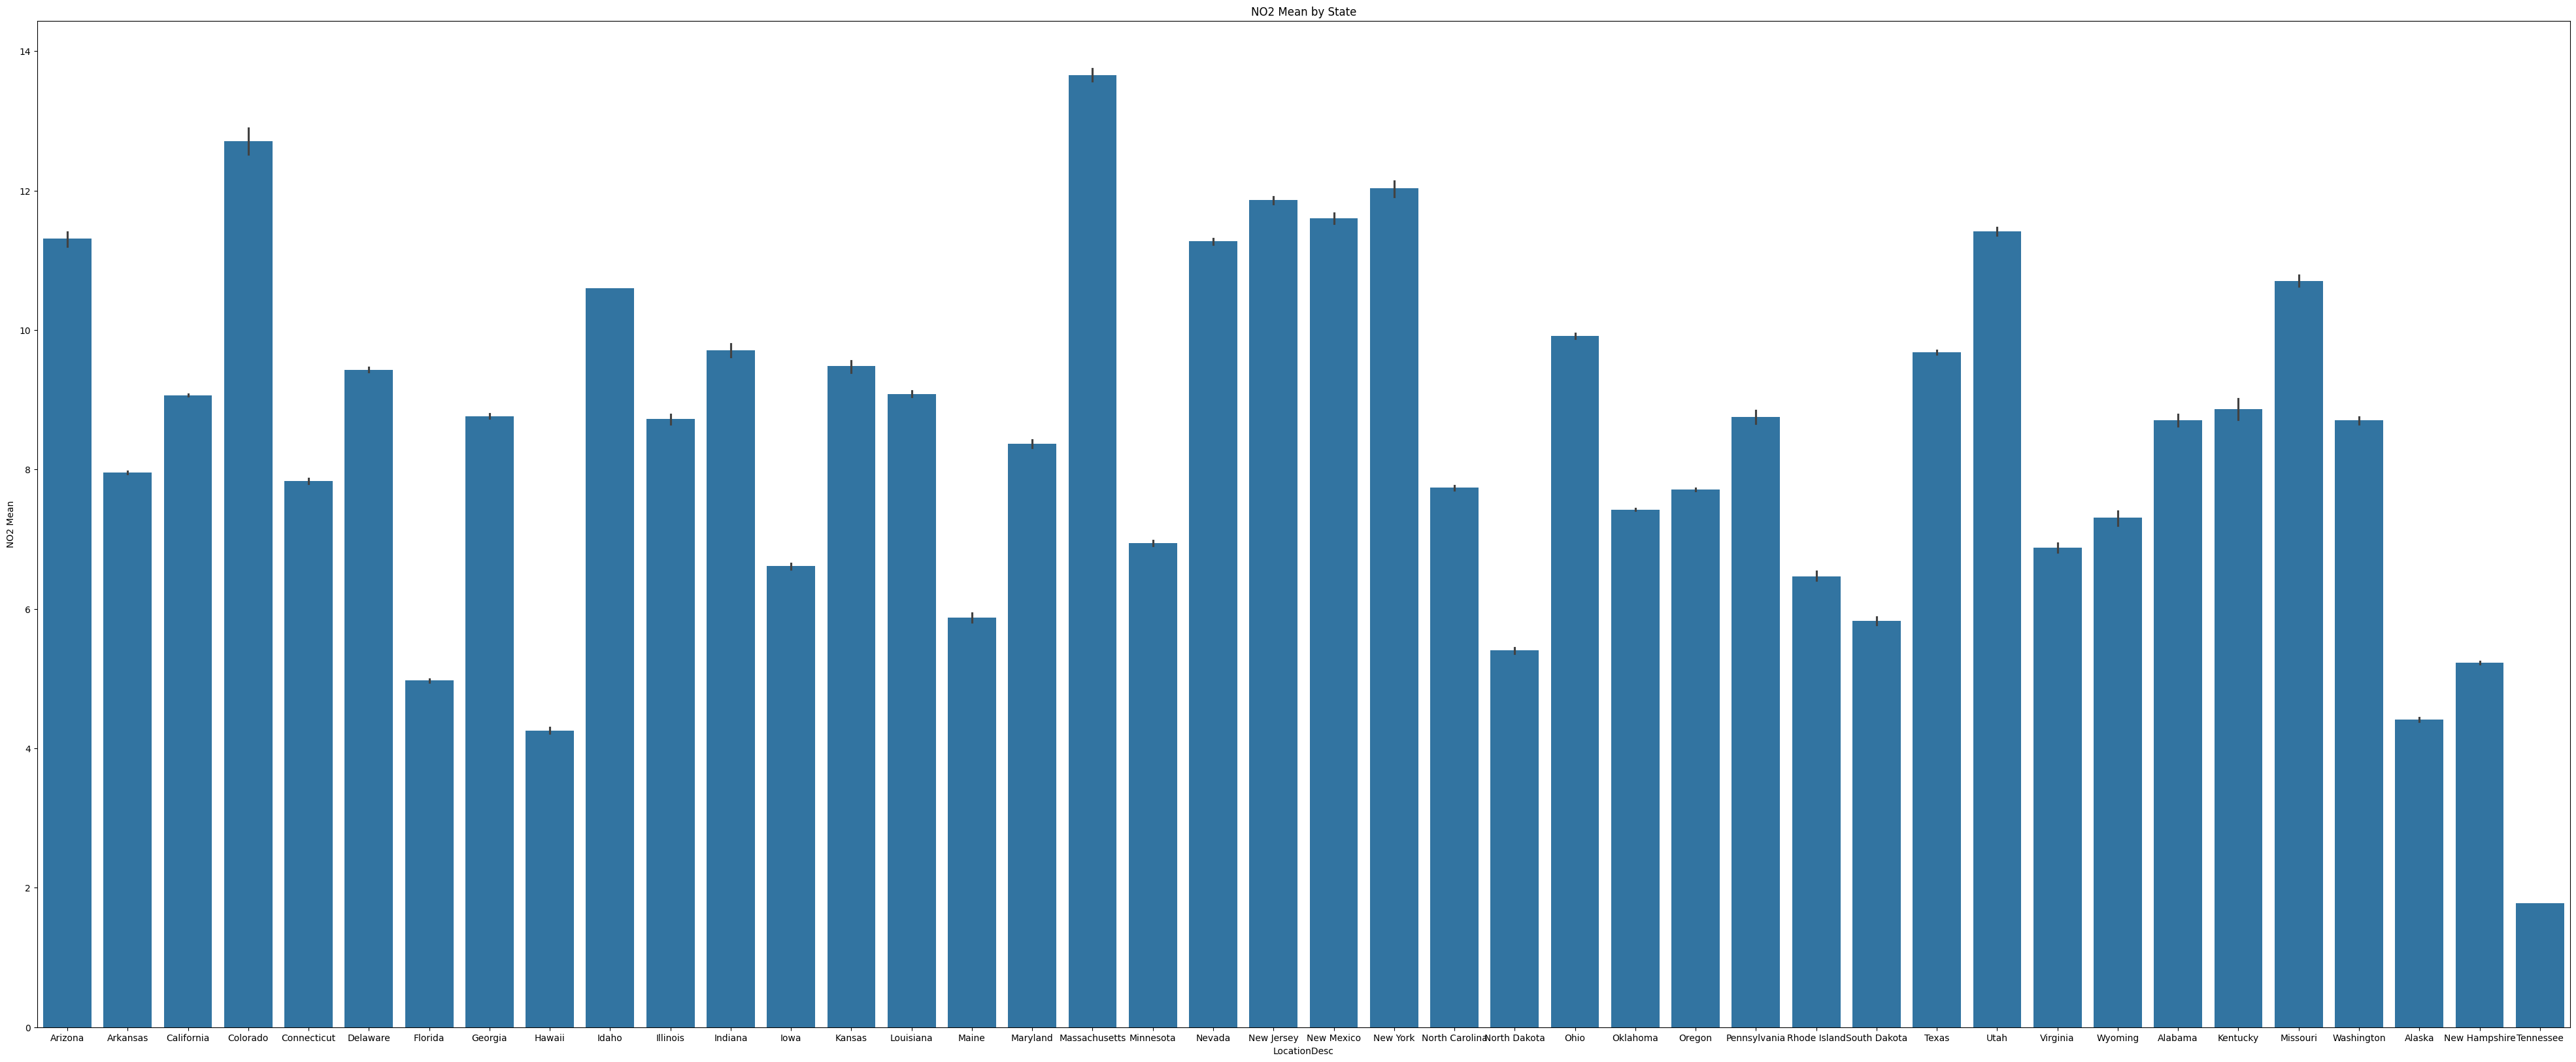

In [ ]:
# Pollution Mean by State

plt.figure(figsize = (50,20))
plt.title("CO Mean by State")
sns.barplot(x = "LocationDesc", y = "CO Mean", data = merged_data)
plt.show()
plt.figure(figsize = (50,20))
plt.title("SO2 Mean by State")
sns.barplot(x = "LocationDesc", y = "SO2 Mean", data = merged_data)
plt.show()
plt.figure(figsize = (50,20))
plt.title("O3 Mean by State")
sns.barplot(x = "LocationDesc", y = "O3 Mean", data = merged_data)
plt.show()
plt.figure(figsize = (50,20))
plt.title("NO2 Mean by State")
sns.barplot(x = "LocationDesc", y = "NO2 Mean", data = merged_data)
plt.show()

In [ ]:
merged_data.groupby('LocationDesc').apply(lambda x: x['CO Mean'].corr(x["Topic"] == "Coronary Heart Disease"))

/usr/local/lib/python3.11/dist-packages/numpy/lib/function_base.py:2897: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/usr/local/lib/python3.11/dist-packages/numpy/lib/function_base.py:2898: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]
<ipython-input-28-ab07e20817f7>:1: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  merged_data.groupby('LocationDesc').apply(lambda x: x['CO Mean'].corr(x["Topic"] == "Coronary Heart Disease"))


,0
LocationDesc,
Alabama,6.522446e-03
Alaska,-5.258061e-02
Arizona,3.566005e-02
Arkansas,1.879419e-02
California,1.354465e-02
Colorado,7.148114e-03
Connecticut,-2.197853e-02
Delaware,-1.964941e-02
Florida,-5.750932e-03


In [ ]:
merged_data.groupby('LocationDesc').apply(lambda x: x['O3 Mean'].corr(x["Topic"] == "Coronary Heart Disease"))

/usr/local/lib/python3.11/dist-packages/numpy/lib/function_base.py:2897: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/usr/local/lib/python3.11/dist-packages/numpy/lib/function_base.py:2898: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]
<ipython-input-29-01056ff15cfb>:1: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  merged_data.groupby('LocationDesc').apply(lambda x: x['O3 Mean'].corr(x["Topic"] == "Coronary Heart Disease"))


,0
LocationDesc,
Alabama,3.532475e-02
Alaska,-5.258061e-02
Arizona,-4.433973e-02
Arkansas,1.000421e-02
California,-1.255443e-02
Colorado,-3.597060e-04
Connecticut,-4.037762e-02
Delaware,6.183110e-03
Florida,1.094615e-02


In [ ]:
merged_data.groupby('LocationDesc').apply(lambda x: x['SO2 Mean'].corr(x["Topic"] == "Coronary Heart Disease"))

<ipython-input-30-16073926bd69>:1: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  merged_data.groupby('LocationDesc').apply(lambda x: x['SO2 Mean'].corr(x["Topic"] == "Coronary Heart Disease"))


,0
LocationDesc,
Alabama,4.435534e-02
Alaska,5.258061e-02
Arizona,5.852632e-02
Arkansas,-8.418888e-04
California,2.410990e-02
Colorado,-1.800284e-02
Connecticut,2.299382e-02
Delaware,4.360115e-03
Florida,2.094691e-02


In [ ]:
merged_data.groupby('LocationDesc').apply(lambda x: x['NO2 Mean'].corr(x["Topic"] == "Coronary Heart Disease"))

/usr/local/lib/python3.11/dist-packages/numpy/lib/function_base.py:2897: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/usr/local/lib/python3.11/dist-packages/numpy/lib/function_base.py:2898: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]
<ipython-input-31-4615239ff5cd>:1: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  merged_data.groupby('LocationDesc').apply(lambda x: x['NO2 Mean'].corr(x["Topic"] == "Coronary Heart Disease"))


,0
LocationDesc,
Alabama,-3.332208e-02
Alaska,-5.258061e-02
Arizona,7.705469e-03
Arkansas,-2.198549e-02
California,-1.364429e-02
Colorado,2.987770e-02
Connecticut,-4.532001e-02
Delaware,1.968843e-02
Florida,2.033386e-02


In [ ]:
merged_data.groupby('LocationDesc').apply(lambda x: x['CO Mean'].corr(x["Topic"] == "Major Cardiovascular Disease"))

/usr/local/lib/python3.11/dist-packages/numpy/lib/function_base.py:2897: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/usr/local/lib/python3.11/dist-packages/numpy/lib/function_base.py:2898: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]
<ipython-input-32-08747fb6f766>:1: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  merged_data.groupby('LocationDesc').apply(lambda x: x['CO Mean'].corr(x["Topic"] == "Major Cardiovascular Disease"))


,0
LocationDesc,
Alabama,-5.916773e-03
Alaska,-5.606447e-02
Arizona,1.888758e-02
Arkansas,1.904460e-02
California,1.553544e-02
Colorado,-1.377825e-03
Connecticut,-1.540460e-02
Delaware,-1.626712e-02
Florida,-6.229565e-03


In [ ]:
merged_data.groupby('LocationDesc').apply(lambda x: x['SO2 Mean'].corr(x["Topic"] == "Major Cardiovascular Disease"))

<ipython-input-33-ab3af2956c1c>:1: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  merged_data.groupby('LocationDesc').apply(lambda x: x['SO2 Mean'].corr(x["Topic"] == "Major Cardiovascular Disease"))


,0
LocationDesc,
Alabama,3.240173e-02
Alaska,5.606447e-02
Arizona,4.238803e-02
Arkansas,-7.060785e-03
California,3.109885e-03
Colorado,-2.729430e-02
Connecticut,2.024404e-02
Delaware,-4.915097e-03
Florida,1.306490e-02


In [ ]:
merged_data.groupby('LocationDesc').apply(lambda x: x['NO2 Mean'].corr(x["Topic"] == "Major Cardiovascular Disease"))

/usr/local/lib/python3.11/dist-packages/numpy/lib/function_base.py:2897: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/usr/local/lib/python3.11/dist-packages/numpy/lib/function_base.py:2898: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]
<ipython-input-34-1cd40ebb5b73>:1: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  merged_data.groupby('LocationDesc').apply(lambda x: x['NO2 Mean'].corr(x["Topic"] == "Major Cardiovascular Disease"))


,0
LocationDesc,
Alabama,-2.037961e-02
Alaska,-5.606447e-02
Arizona,7.355817e-03
Arkansas,-2.189264e-02
California,1.596645e-03
Colorado,2.235035e-02
Connecticut,-4.240369e-02
Delaware,1.344123e-02
Florida,2.178552e-02


In [ ]:
merged_data.groupby('LocationDesc').apply(lambda x: x['O3 Mean'].corr(x["Topic"] == "Major Cardiovascular Disease"))

/usr/local/lib/python3.11/dist-packages/numpy/lib/function_base.py:2897: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/usr/local/lib/python3.11/dist-packages/numpy/lib/function_base.py:2898: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]
<ipython-input-35-fdfbc7353396>:1: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  merged_data.groupby('LocationDesc').apply(lambda x: x['O3 Mean'].corr(x["Topic"] == "Major Cardiovascular Disease"))


,0
LocationDesc,
Alabama,2.248877e-02
Alaska,-5.606447e-02
Arizona,-2.208067e-02
Arkansas,2.953825e-03
California,-1.800725e-02
Colorado,1.544052e-02
Connecticut,-3.834862e-02
Delaware,8.929358e-03
Florida,1.505575e-02


In [ ]:
merged_data.groupby('LocationDesc').apply(lambda x: x['O3 Mean'].corr(x["Topic"] == "Stroke"))

/usr/local/lib/python3.11/dist-packages/numpy/lib/function_base.py:2897: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/usr/local/lib/python3.11/dist-packages/numpy/lib/function_base.py:2898: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]
<ipython-input-36-c0a62127f032>:1: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  merged_data.groupby('LocationDesc').apply(lambda x: x['O3 Mean'].corr(x["Topic"] == "Stroke"))


,0
LocationDesc,
Alabama,7.784374e-03
Alaska,-5.606447e-02
Arizona,-5.200030e-02
Arkansas,9.172025e-03
California,-1.306937e-02
Colorado,1.760325e-03
Connecticut,-4.840560e-02
Delaware,-3.949920e-03
Florida,1.793383e-02


In [ ]:
merged_data.groupby('LocationDesc').apply(lambda x: x['NO2 Mean'].corr(x["Topic"] == "Stroke"))

/usr/local/lib/python3.11/dist-packages/numpy/lib/function_base.py:2897: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/usr/local/lib/python3.11/dist-packages/numpy/lib/function_base.py:2898: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]
<ipython-input-37-5eaee7dc17f8>:1: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  merged_data.groupby('LocationDesc').apply(lambda x: x['NO2 Mean'].corr(x["Topic"] == "Stroke"))


,0
LocationDesc,
Alabama,-5.783023e-03
Alaska,-5.606447e-02
Arizona,1.301238e-02
Arkansas,-9.725463e-03
California,-4.365237e-03
Colorado,2.369488e-02
Connecticut,-2.372989e-02
Delaware,1.665452e-02
Florida,2.702453e-02


In [ ]:
merged_data.groupby('LocationDesc').apply(lambda x: x['CO Mean'].corr(x["Topic"] == "Stroke"))

/usr/local/lib/python3.11/dist-packages/numpy/lib/function_base.py:2897: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/usr/local/lib/python3.11/dist-packages/numpy/lib/function_base.py:2898: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]
<ipython-input-38-d371494b951d>:1: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  merged_data.groupby('LocationDesc').apply(lambda x: x['CO Mean'].corr(x["Topic"] == "Stroke"))


,0
LocationDesc,
Alabama,-1.739299e-02
Alaska,-5.606447e-02
Arizona,3.916101e-02
Arkansas,2.827942e-02
California,1.254561e-02
Colorado,3.595828e-03
Connecticut,-6.154390e-03
Delaware,-1.671630e-02
Florida,7.877342e-04


In [ ]:
merged_data.groupby('LocationDesc').apply(lambda x: x['SO2 Mean'].corr(x["Topic"] == "Stroke"))

<ipython-input-39-c1cdc840621c>:1: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  merged_data.groupby('LocationDesc').apply(lambda x: x['SO2 Mean'].corr(x["Topic"] == "Stroke"))


,0
LocationDesc,
Alabama,1.756117e-02
Alaska,5.606447e-02
Arizona,7.202433e-02
Arkansas,1.147243e-03
California,8.901413e-03
Colorado,-8.056408e-03
Connecticut,-8.867917e-04
Delaware,5.432969e-03
Florida,2.583896e-02


In [ ]:
merged_data.groupby('LocationDesc').apply(lambda x: x['NO2 Mean'].corr(x["Topic"] == "Acute Myocardial Infarction (Heart Attack)"))

/usr/local/lib/python3.11/dist-packages/numpy/lib/function_base.py:2897: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/usr/local/lib/python3.11/dist-packages/numpy/lib/function_base.py:2898: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]
<ipython-input-40-d998bffdf955>:1: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  merged_data.groupby('LocationDesc').apply(lambda x: x['NO2 Mean'].corr(x["Topic"] == "Acute Myocardial Infarction (Heart Attack)"))


,0
LocationDesc,
Alabama,-2.625858e-02
Alaska,-5.606447e-02
Arizona,1.483449e-02
Arkansas,-2.077341e-02
California,4.839839e-03
Colorado,2.426548e-02
Connecticut,-4.665694e-02
Delaware,2.685208e-02
Florida,2.588038e-02


In [ ]:
merged_data.groupby('LocationDesc').apply(lambda x: x['O3 Mean'].corr(x["Topic"] == "Acute Myocardial Infarction (Heart Attack)"))

/usr/local/lib/python3.11/dist-packages/numpy/lib/function_base.py:2897: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/usr/local/lib/python3.11/dist-packages/numpy/lib/function_base.py:2898: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]
<ipython-input-41-6f0f2dc5b625>:1: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  merged_data.groupby('LocationDesc').apply(lambda x: x['O3 Mean'].corr(x["Topic"] == "Acute Myocardial Infarction (Heart Attack)"))


,0
LocationDesc,
Alabama,2.777374e-02
Alaska,-5.606447e-02
Arizona,-5.243749e-02
Arkansas,2.802815e-03
California,-9.201978e-03
Colorado,7.627851e-03
Connecticut,-3.437609e-02
Delaware,5.866948e-04
Florida,1.935651e-02


In [ ]:
merged_data.groupby('LocationDesc').apply(lambda x: x['CO Mean'].corr(x["Topic"] == "Acute Myocardial Infarction (Heart Attack)"))

/usr/local/lib/python3.11/dist-packages/numpy/lib/function_base.py:2897: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/usr/local/lib/python3.11/dist-packages/numpy/lib/function_base.py:2898: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]
<ipython-input-42-b824cda2c3df>:1: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  merged_data.groupby('LocationDesc').apply(lambda x: x['CO Mean'].corr(x["Topic"] == "Acute Myocardial Infarction (Heart Attack)"))


,0
LocationDesc,
Alabama,5.845554e-03
Alaska,-5.606447e-02
Arizona,3.504708e-02
Arkansas,1.807097e-02
California,7.965977e-03
Colorado,-4.981823e-05
Connecticut,-1.895950e-02
Delaware,-2.916712e-02
Florida,2.925431e-03


In [ ]:
merged_data.groupby('LocationDesc').apply(lambda x: x['SO2 Mean'].corr(x["Topic"] == "Acute Myocardial Infarction (Heart Attack)"))

<ipython-input-43-ae42c8b734a3>:1: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  merged_data.groupby('LocationDesc').apply(lambda x: x['SO2 Mean'].corr(x["Topic"] == "Acute Myocardial Infarction (Heart Attack)"))


,0
LocationDesc,
Alabama,3.457731e-02
Alaska,5.606447e-02
Arizona,6.403269e-02
Arkansas,-6.699812e-03
California,1.083423e-02
Colorado,-5.598752e-03
Connecticut,2.685393e-02
Delaware,1.582041e-02
Florida,1.937194e-02
